In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
from heapq import merge
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\n23-webb\OneDrive - UWE Bristol\study\studyanalysis\transformations.py:1924: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


## Create DF for VICON data

In [2]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study4H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in file])

# file = Path("study1H.csv")
# GROUP=file.name.split("H")[0]
# d_df = pd.read_csv(file)
# d_df['GROUP'] = GROUP

# file2 = Path("study2H.csv")
# GROUP2=file2.name.split("H")[0]
# d_df2 = pd.read_csv(file2)
# d_df2['GROUP'] = GROUP2


# data_df = d_df.append(d_df2, ignore_index=True)
# data_df = pd.concat([d_df, d_df2], ignore_index=True, sort=False)

csv_files = Path("").glob("*H.csv")
data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files], ignore_index=True)
# data_df['GROUP'] = 

In [3]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0 -0.531101 -0.333302 -89.182247  -254.536621   
1           2          0 -0.530232 -0.333210 -89.183413  -254.822189   
2           3          0 -0.529697 -0.333456 -89.184796  -255.115692   
3           4          0 -0.529533 -0.334137 -89.186532  -255.348618   
4           5          0 -0.529070 -0.334084 -89.188290  -255.564484   
...       ...        ...       ...       ...        ...          ...   
384290  59310          0  2.737314  1.189883 -88.472418   953.185486   
384291  59311          0  2.009243 -2.953588 -88.541000  1148.113281   
384292  59312          0  2.010661 -2.952954 -88.538241  1145.759155   
384293  59313          0  2.009497 -2.951181 -88.533041  1143.277710   
384294  59314          0       NaN       NaN        NaN          NaN   

                1TY          1TZ       2RX       2RY  ...          4TX  \
0       -930.866882  1850.038452       NaN       NaN  ...   684.229614   
1       -933.103638  1850.221924       NaN       NaN  ...   684.299744   
2       -935.399841  1850.361450       NaN       NaN  ...   684.386841   
3       -937.724121  1850.489380       NaN       NaN  ...   684.482544   
4       -939.977295  1850.521240       NaN       NaN  ...   684.567993   
...             ...          ...       ...       ...  ...          ...   
384290  2367.276123  1779.521851  1.435446 -1.929540  ...          NaN   
384291  2257.092285  1739.421265  1.437920 -1.928547  ...          NaN   
384292  2255.737305  1739.484863  1.490210 -1.879370  ...          NaN   
384293  2254.541260  1739.586914  1.496017 -1.874628  ...          NaN   
384294          NaN          NaN  1.501008 -1.870444  ...  1144.910400   

                4TY          4TZ       5RX       5RY        5RZ          5TX  \
0       1060.858765  1826.873291  0.153310  0.004180 -89.555885    22.398699   
1       1061.047607  1826.873901  0.149642  0.005533 -89.561732    23.567402   
2       1061.252197  1826.874512  0.151045  0.005097 -89.559180    24.715961   
3       1061.452759  1826.874634  0.153457  0.005756 -89.558339    25.771767   
4       1061.673096  1826.877686  0.157796  0.005201 -89.555584    26.902363   
...             ...          ...       ...       ...        ...          ...   
384290          NaN          NaN  0.418893  0.802911 -89.006688  1019.692566   
384291          NaN          NaN  2.281782  3.370775 -89.470117  1528.373535   
384292          NaN          NaN  2.282060  3.371709 -89.469974  1527.615112   
384293          NaN          NaN  2.286496  3.370192 -89.470366  1527.082031   
384294  2213.860596  1764.988037  2.280848  3.375016 -89.472344  1526.210327   

                5TY          5TZ   GROUP  
0        721.422119  1764.118286  study6  
1        721.023132  1763.655273  study6  
2        720.916443  1763.355469  study6  
3        720.637390  1763.055786  study6  
4        720.134338  1762.745483  study6  
...             ...          ...     ...  
384290  2303.636719  1762.366699  study1  
384291  1990.245605  1574.301392  study1  
384292  1989.850342  1573.557861  study1  
384293  1989.480591  1572.941895  study1  
384294  1989.219727  1572.294556  study1  

[384295 rows x 33 columns]

In [499]:
data_df.columns
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0       NaN       NaN        NaN          NaN   
1           2          0       NaN       NaN        NaN          NaN   
2           3          0       NaN       NaN        NaN          NaN   
3           4          0  2.425969  0.099261 -89.028012  -723.095154   
4           5          0  2.426525  0.098838 -89.028694  -723.002930   
...       ...        ...       ...       ...        ...          ...   
384290  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
384291  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
384292  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
384293  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
384294  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

                1TY          1TZ       2RX       2RY  ...          4TX  \
0               NaN          NaN       NaN       NaN  ...   -86.220253   
1               NaN          NaN       NaN       NaN  ...   -86.903648   
2               NaN          NaN       NaN       NaN  ...   -87.555389   
3       -749.753662  1761.347290       NaN       NaN  ...   -88.151741   
4       -749.562805  1761.383179       NaN       NaN  ...   -88.929825   
...             ...          ...       ...       ...  ...          ...   
384290 -1438.786865  1068.234619  0.409880 -3.846665  ...  1949.711304   
384291 -1438.802124  1068.252686  0.406747 -3.846874  ...  1949.705444   
384292 -1438.787964  1068.242188  0.405425 -3.845295  ...  1949.700439   
384293 -1438.788452  1068.236450  0.407506 -3.846482  ...  1949.710205   
384294 -1438.820312  1068.266724  0.409008 -3.846727  ...  1949.689697   

                4TY          4TZ       5RX       5RY        5RZ         5TX  \
0        818.517395  1798.021973  1.212219  0.045618 -87.467487  -38.479145   
1        819.127197  1798.149170  1.213007  0.045643 -87.467487  -39.157539   
2        819.722473  1798.270142  1.213187  0.046975 -87.467861  -39.863754   
3        820.284424  1798.372803  1.212633  0.047152 -87.468085  -40.523148   
4        820.954712  1798.596069  1.212393  0.046770 -87.468515  -41.103912   
...             ...          ...       ...       ...        ...         ...   
384290 -1842.257202  1063.357056 -0.003808 -0.126373 -89.876357  663.993103   
384291 -1842.252808  1063.356323 -0.003754 -0.126231 -89.876319  663.992859   
384292 -1842.249268  1063.353149 -0.003746 -0.126173 -89.876350  663.987854   
384293 -1842.260132  1063.359741 -0.003903 -0.126301 -89.876301  663.994568   
384294 -1842.246460  1063.345215 -0.003805 -0.126234 -89.876352  663.986206   

                5TY          5TZ   GROUP  
0        855.451111  1773.667480  study1  
1        856.090454  1773.793701  study1  
2        856.770325  1773.937378  study1  
3        857.447632  1774.108154  study1  
4        857.965637  1774.213135  study1  
...             ...          ...     ...  
384290 -2095.846924   882.212646  study6  
384291 -2095.852539   882.222839  study6  
384292 -2095.842529   882.218140  study6  
384293 -2095.847656   882.218689  study6  
384294 -2095.847900   882.214844  study6  

[384295 rows x 33 columns]

##### Distance - plot distance from person to person

In [4]:
df_dist= pd.DataFrame()  

print(data_df['Frame'].values)
OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist['GROUP'] = data_df['GROUP']
df_dist["Frame2"] = data_df['Frame'].astype(int)

df_dist

[    1     2     3 ... 59312 59313 59314]


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0                NaN      0.177126      0.326157      0.451580           NaN   
1                NaN      0.177566      0.326504      0.452135           NaN   
2                NaN      0.178016      0.326864      0.452783           NaN   
3                NaN      0.178471      0.327223      0.453387           NaN   
4                NaN      0.178916      0.327574      0.453914           NaN   
...              ...           ...           ...           ...           ...   
384290      0.207852      0.044680           NaN      0.023605      0.207852   
384291      0.175072      0.234124           NaN      0.124294      0.175072   
384292      0.175262      0.234266           NaN      0.124499      0.175262   
384293      0.175397      0.234397           NaN      0.124804      0.175397   
384294           NaN           NaN           NaN           NaN           NaN   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0                NaN           NaN           NaN      0.177126           NaN   
1                NaN           NaN           NaN      0.177566           NaN   
2                NaN           NaN           NaN      0.178016           NaN   
3                NaN           NaN           NaN      0.178471           NaN   
4                NaN           NaN           NaN      0.178916           NaN   
...              ...           ...           ...           ...           ...   
384290      0.190196           NaN      0.194140      0.044680      0.190196   
384291      0.006081           NaN      0.107014      0.234124      0.006081   
384292      0.006067           NaN      0.107083      0.234266      0.006067   
384293      0.006039           NaN      0.107038      0.234397      0.006039   
384294      0.006021      0.177707      0.107038           NaN      0.006021   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...           NaN      0.232979      0.112358      0.451580   
1       ...           NaN      0.232987      0.112251      0.452135   
2       ...           NaN      0.233000      0.112130      0.452783   
3       ...           NaN      0.233012      0.112034      0.453387   
4       ...           NaN      0.233024      0.111944      0.453914   
...     ...           ...           ...           ...           ...   
384290  ...           NaN           NaN           NaN      0.023605   
384291  ...           NaN           NaN           NaN      0.124294   
384292  ...           NaN           NaN           NaN      0.124499   
384293  ...           NaN           NaN           NaN      0.124804   
384294  ...      0.177707      0.199556      0.066716           NaN   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0                NaN      0.139680      0.112358       0  study6       1  
1                NaN      0.139671      0.112251       1  study6       2  
2                NaN      0.139712      0.112130       2  study6       3  
3                NaN      0.139716      0.112034       3  study6       4  
4                NaN      0.139687      0.111944       4  study6       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.194140      0.026613           NaN  384290  study1   59310  
384291      0.107014      0.140618           NaN  384291  study1   59311  
384292      0.107083      0.140604           NaN  384292  study1   59312  
384293      0.107038      0.140510           NaN  384293  study1   59313  
384294      0.107038      0.140502      0.066716  384294  study1   59314  

[384295 rows x 23 columns]

### Plot location

10000   -1442.157959
10001   -1442.608643
10002   -1443.224365
10003   -1443.643066
10004   -1443.928589
            ...     
59309    1019.692566
59310    1528.373535
59311    1527.615112
59312    1527.082031
59313    1526.210327
Name: 5TX, Length: 49314, dtype: float64


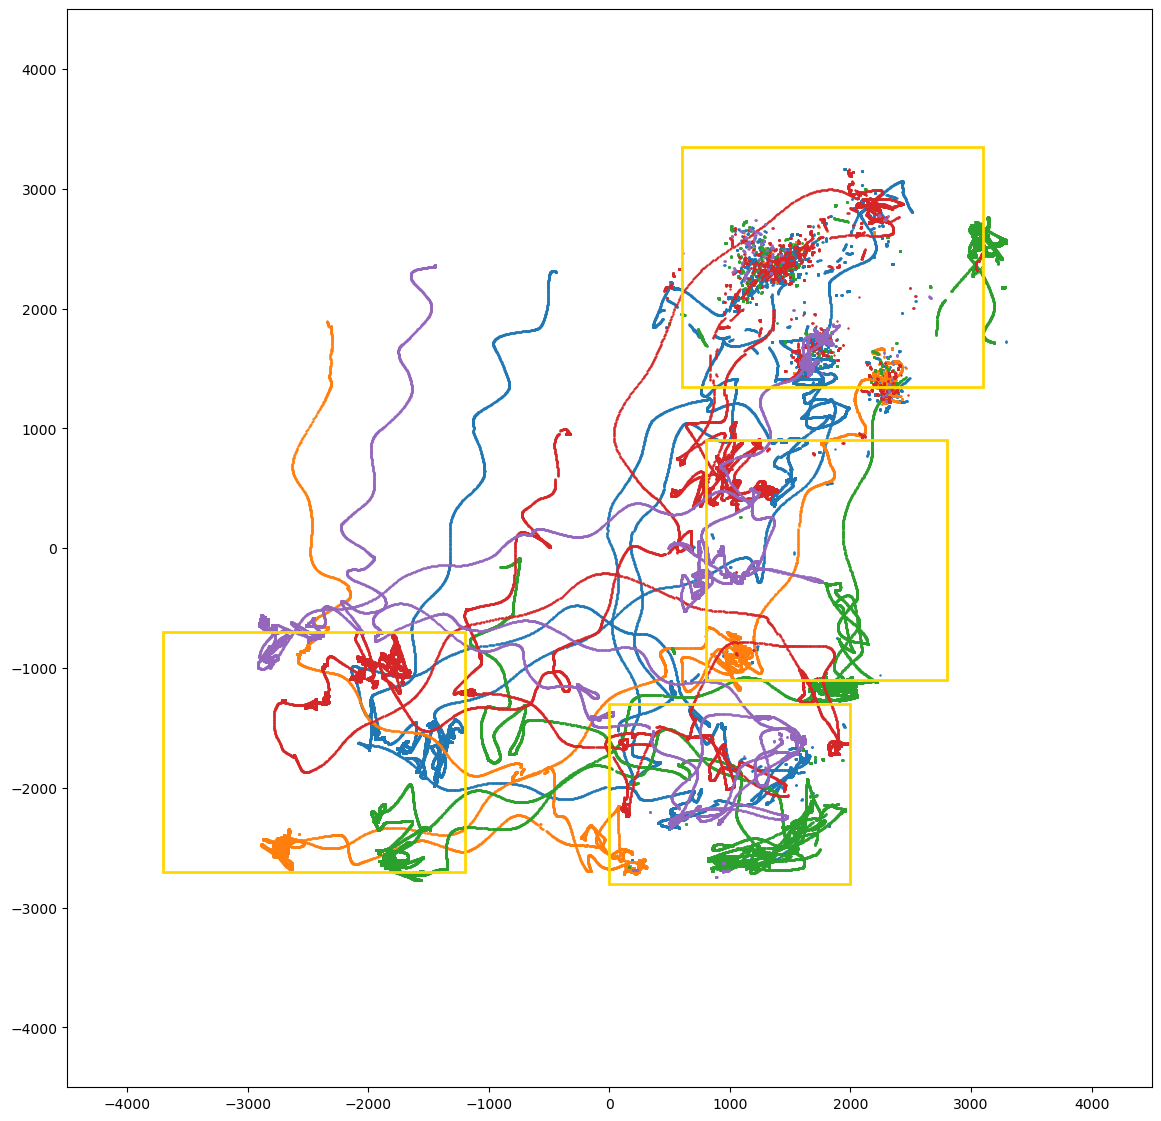

10000   -1320.150757
10001   -1319.952881
10002   -1319.769165
10003   -1319.582275
10004   -1319.413452
            ...     
76350            NaN
76351            NaN
76352            NaN
76353            NaN
76354            NaN
Name: 5TX, Length: 66355, dtype: float64


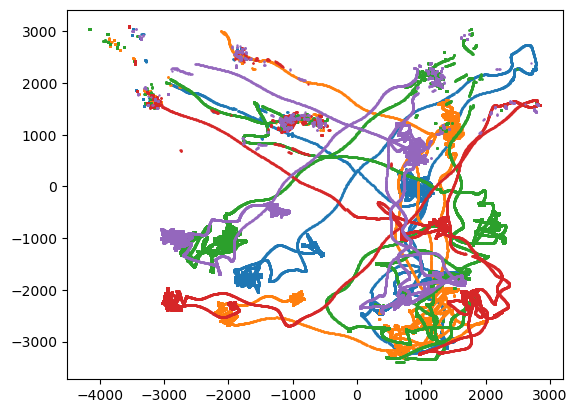

10000   -1445.514648
10001   -1445.390259
10002   -1445.977295
10003   -1446.026123
10004   -1445.925415
            ...     
48970    1282.454346
48971    1278.942993
48972    1275.679932
48973    1272.850464
48974    1269.163818
Name: 5TX, Length: 38975, dtype: float64


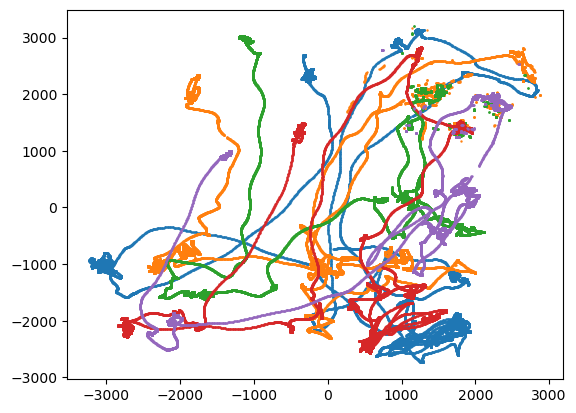

10000     410.397247
10001     411.878571
10002     413.324554
10003     414.709473
10004     416.060822
            ...     
73044    2604.039062
73045    2604.049805
73046    2604.036621
73047    2604.043701
73048    2604.054199
Name: 5TX, Length: 63049, dtype: float64


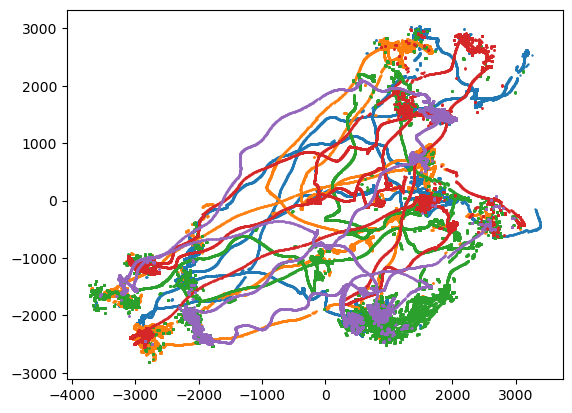

10000   -2343.827148
10001   -2343.745850
10002   -2343.613037
10003   -2343.480469
10004   -2343.310791
            ...     
46479     700.212280
46480     698.153992
46481     694.938049
46482    2513.056885
46483    2513.210693
Name: 5TX, Length: 36484, dtype: float64


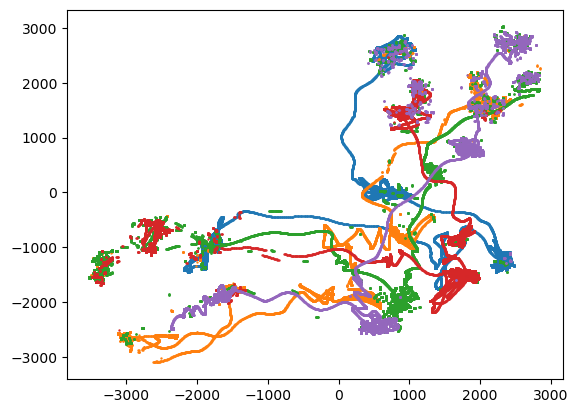

10000   -285.237427
10001   -285.258026
10002   -285.380920
10003   -285.289642
10004   -285.168915
            ...    
80113    663.993103
80114    663.992859
80115    663.987854
80116    663.994568
80117    663.986206
Name: 5TX, Length: 70118, dtype: float64


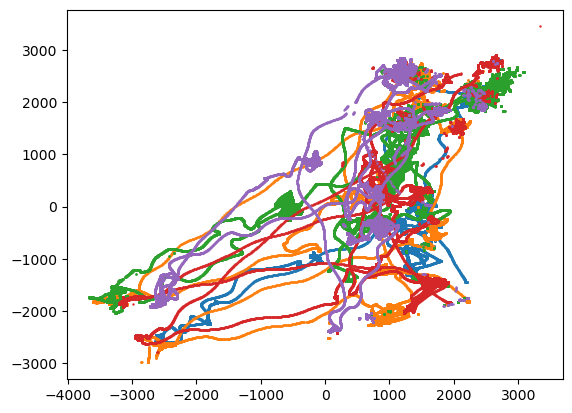

In [7]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

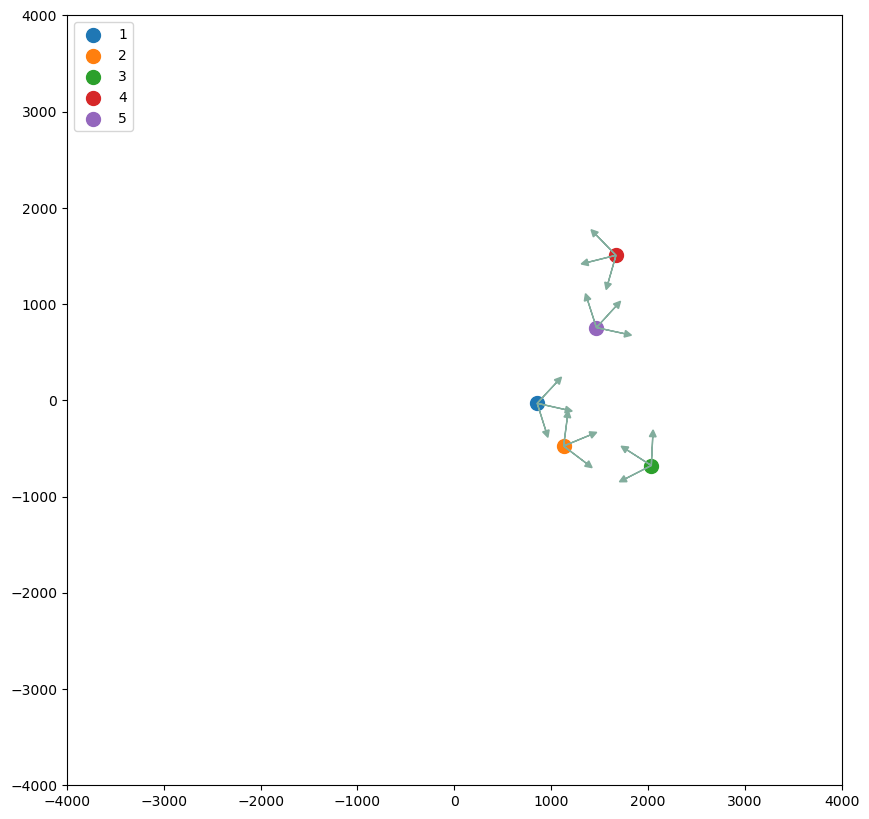

47080


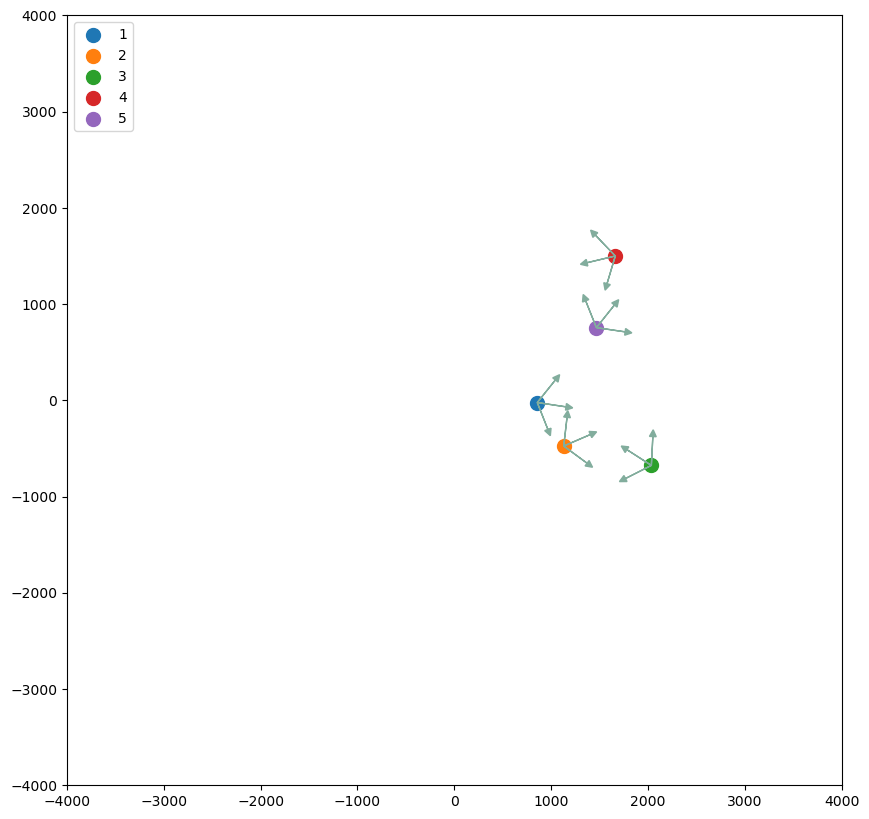

47085


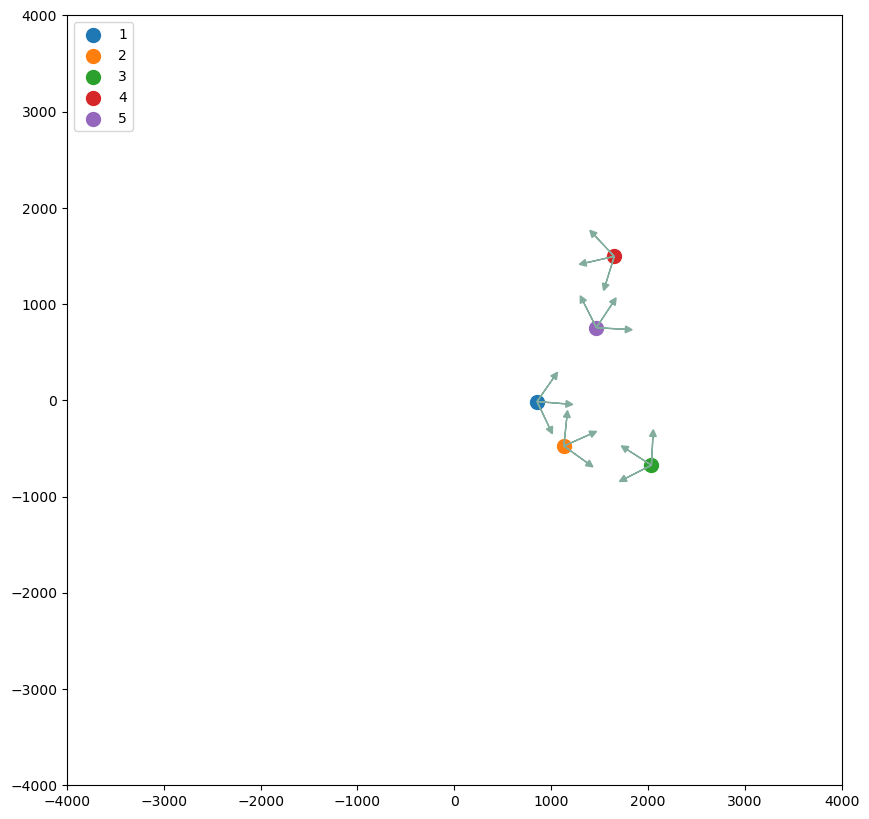

47090


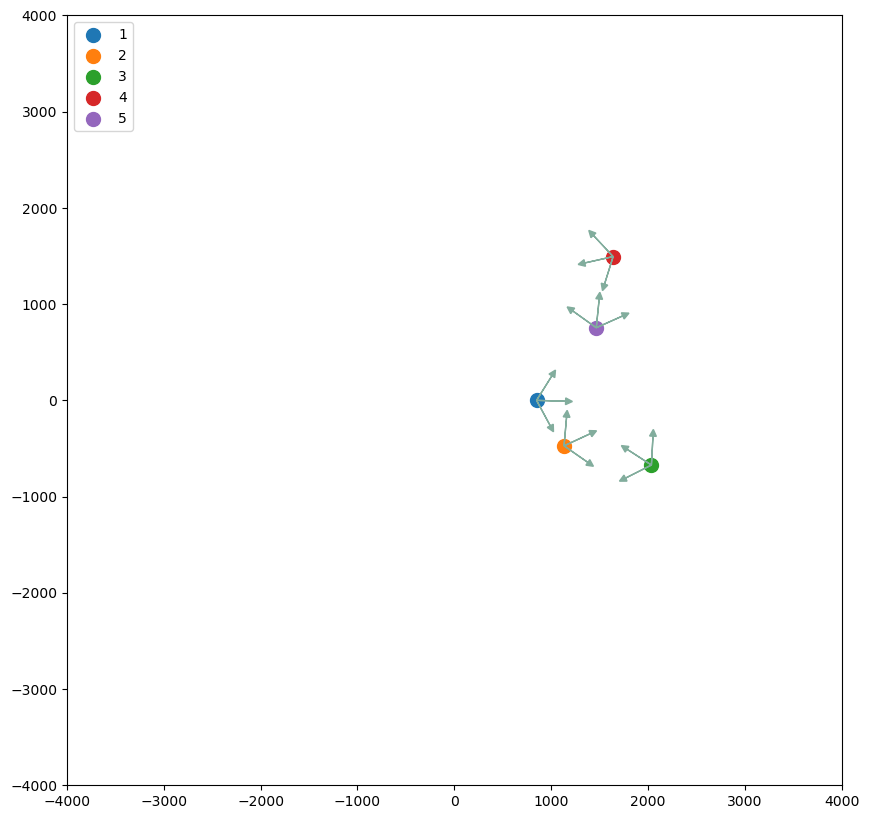

47095


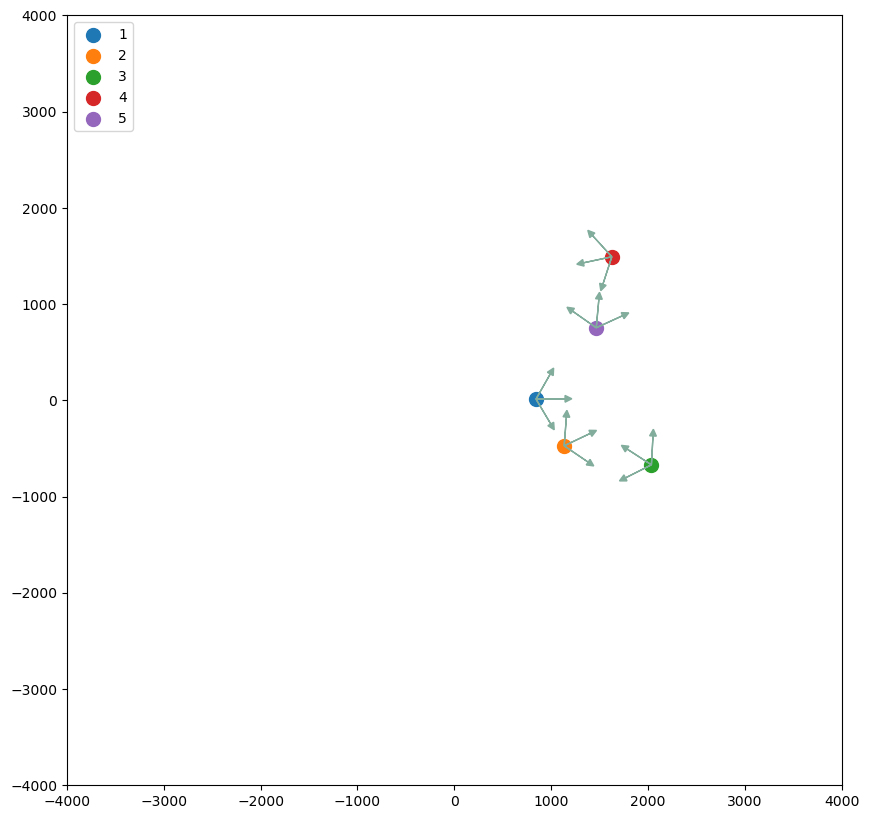

47100


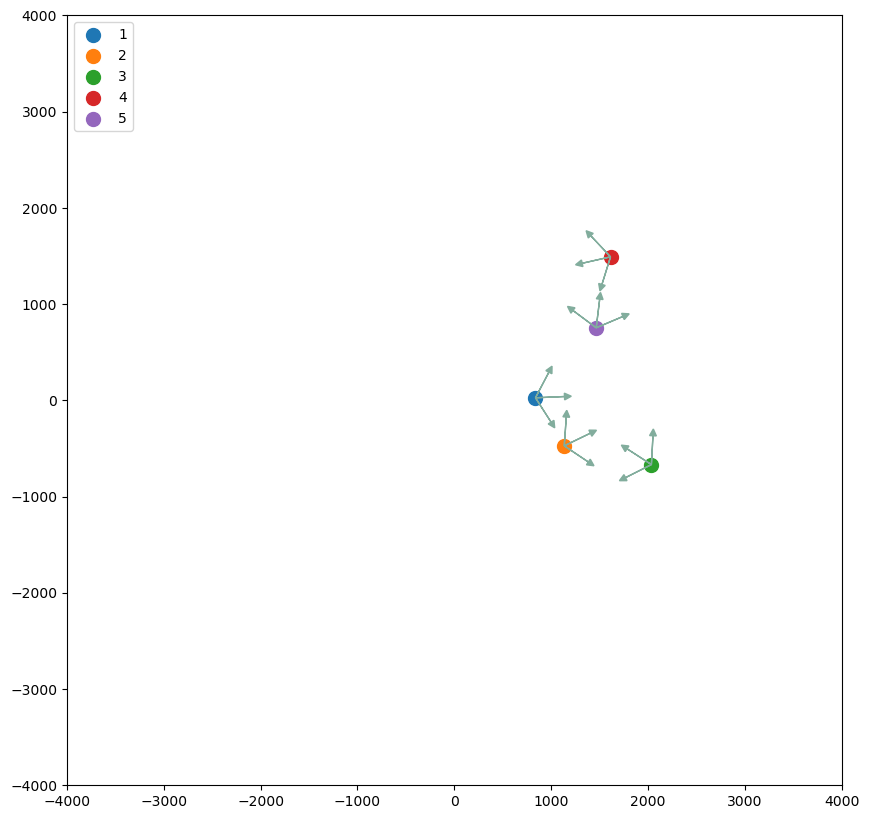

47105


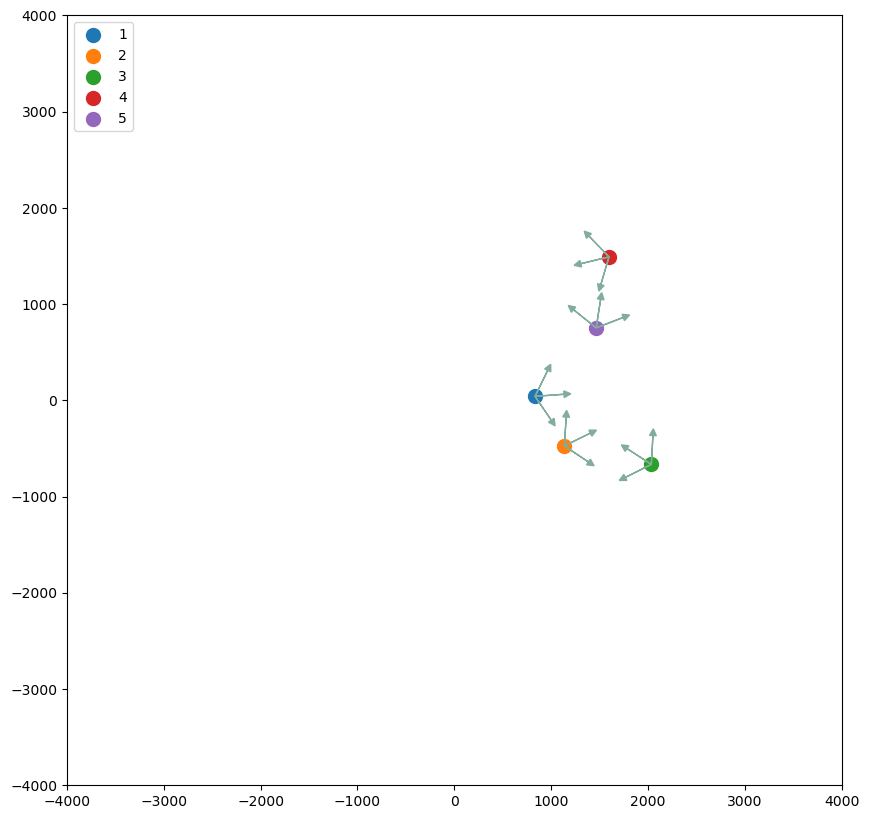

47110


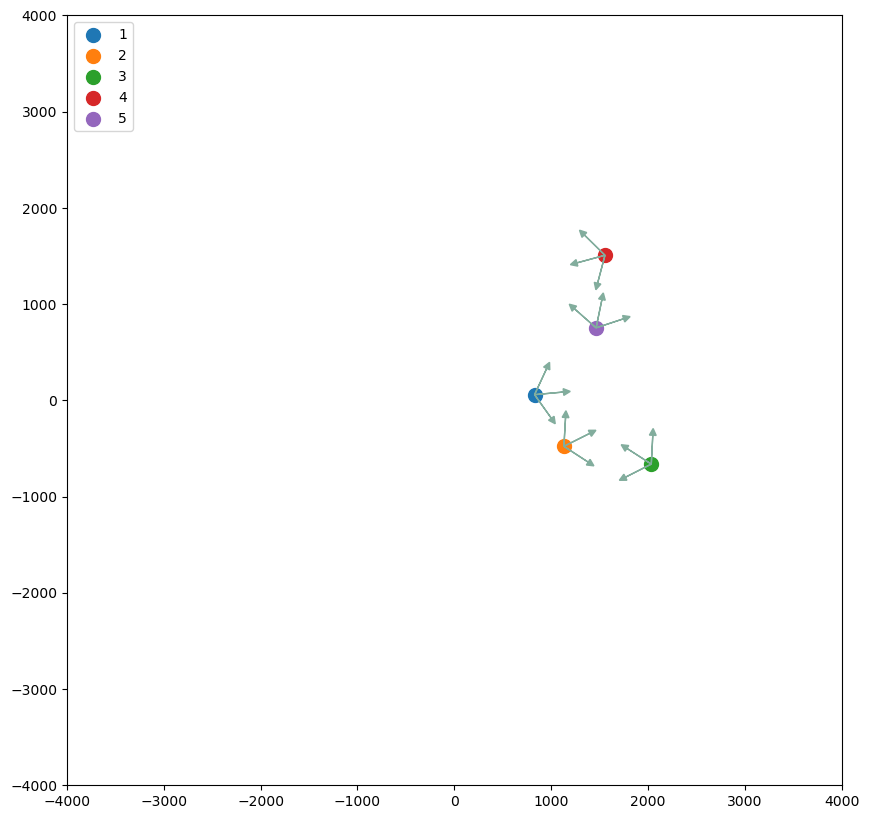

47115


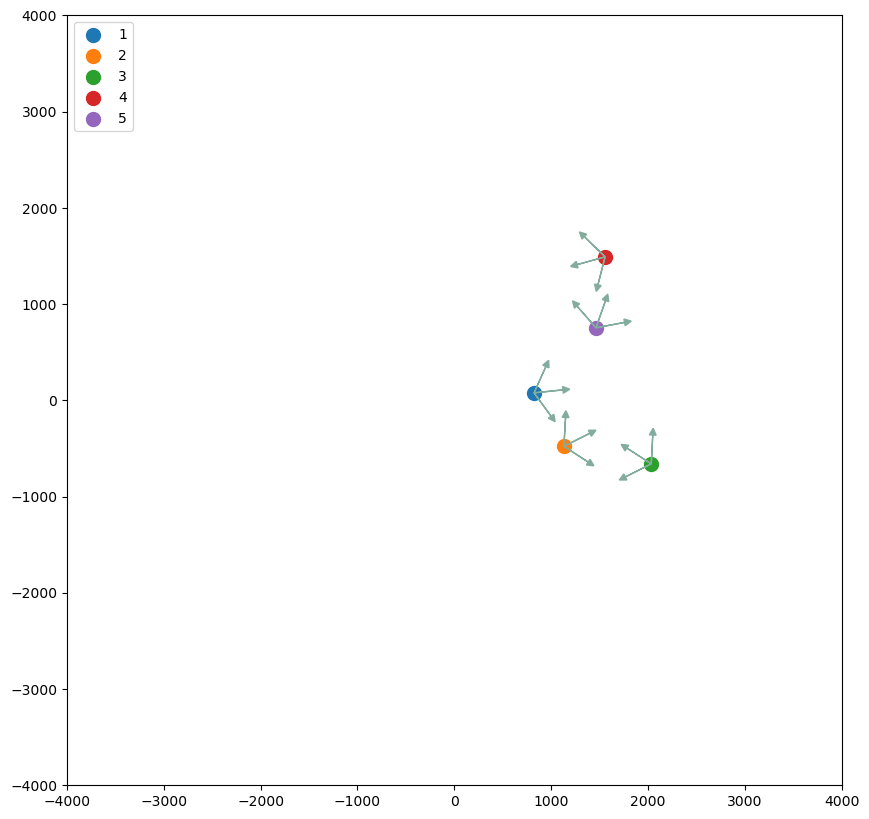

47120


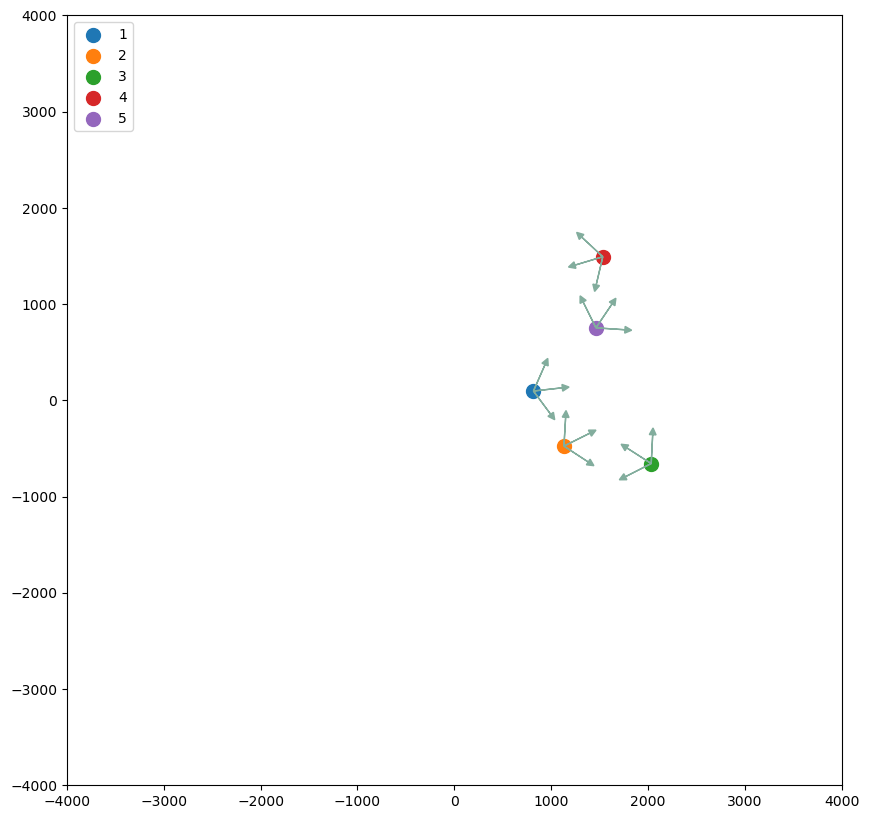

47125


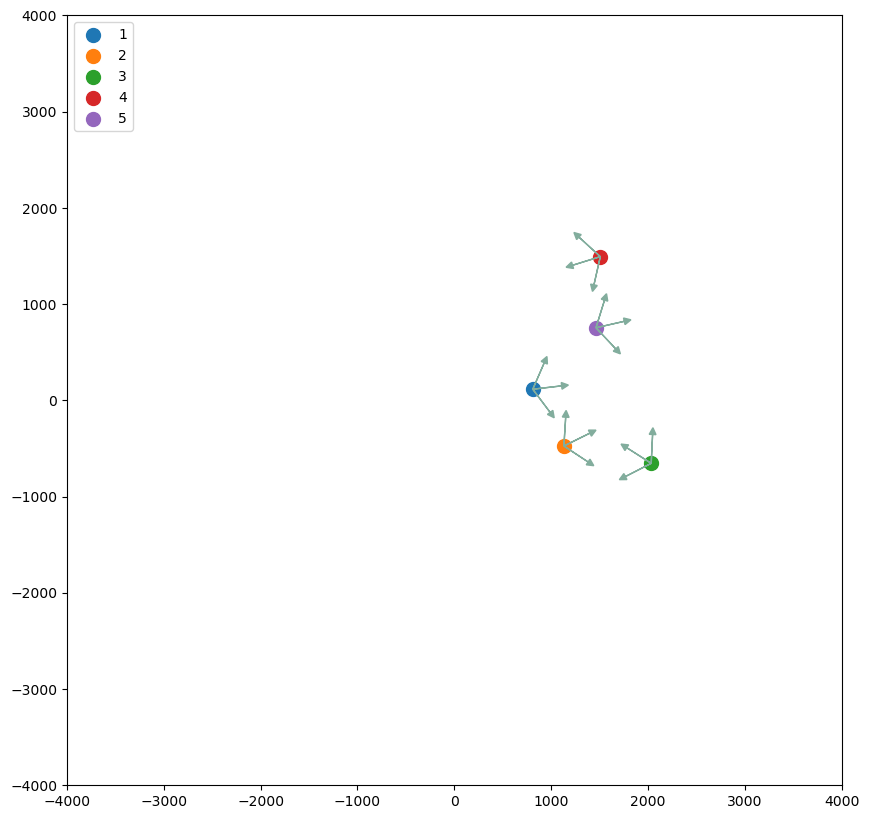

47130


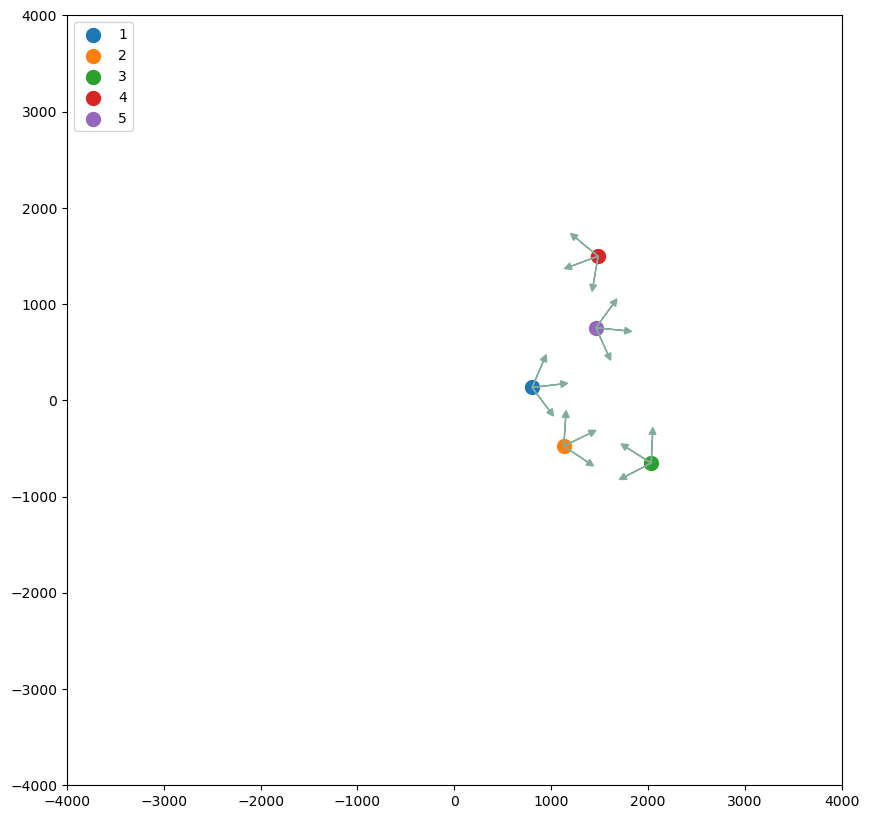

47135


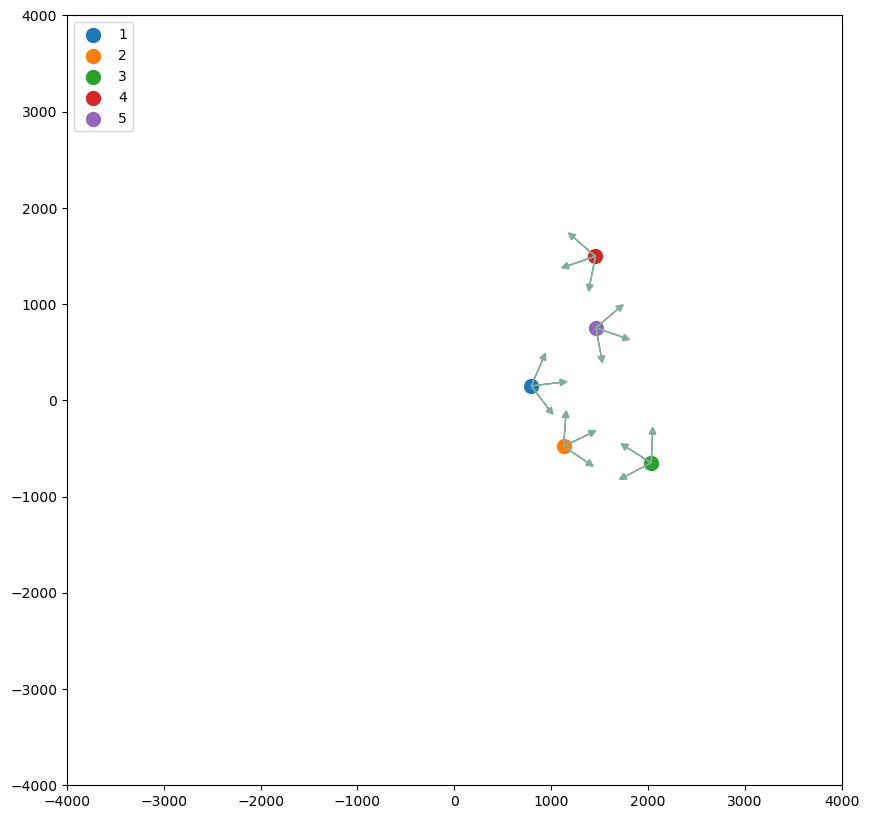

47140


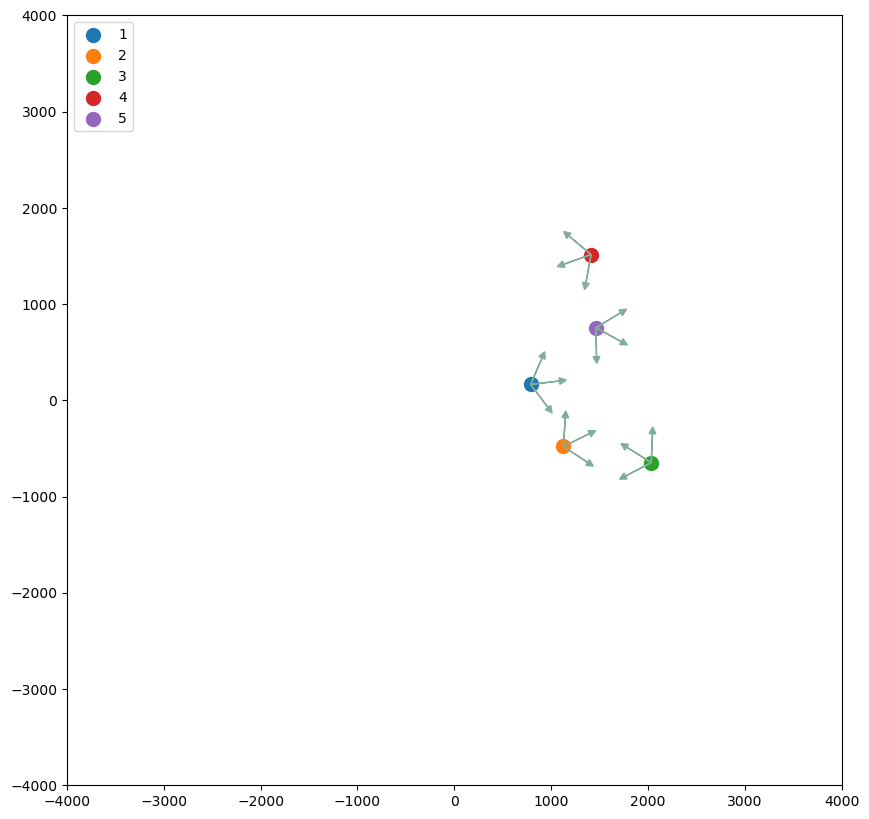

47145


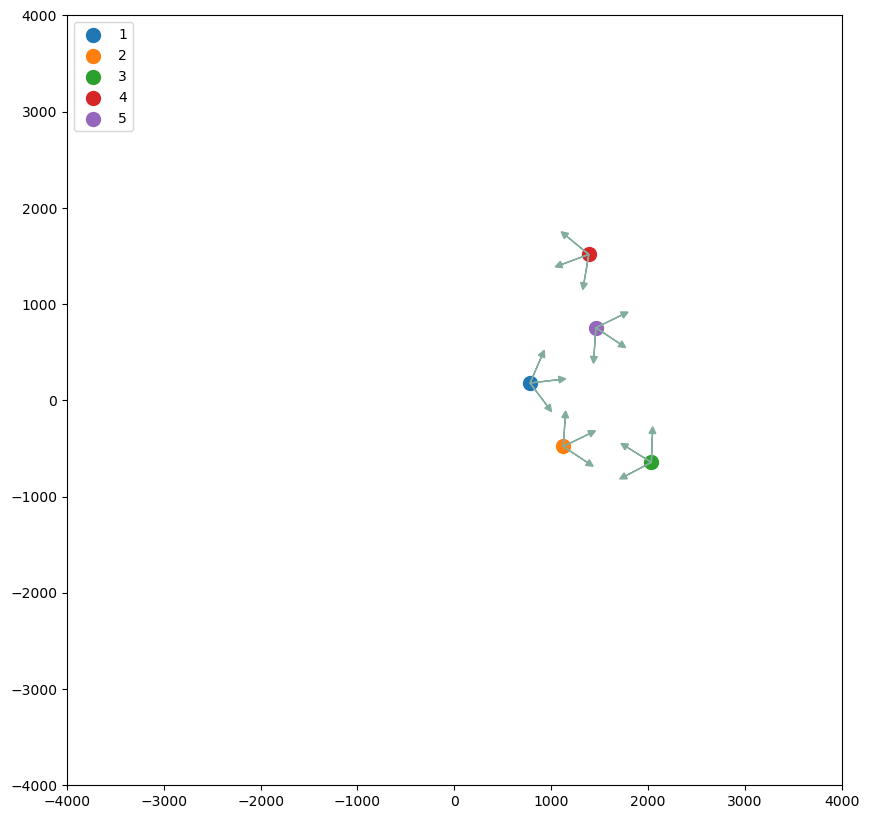

47150


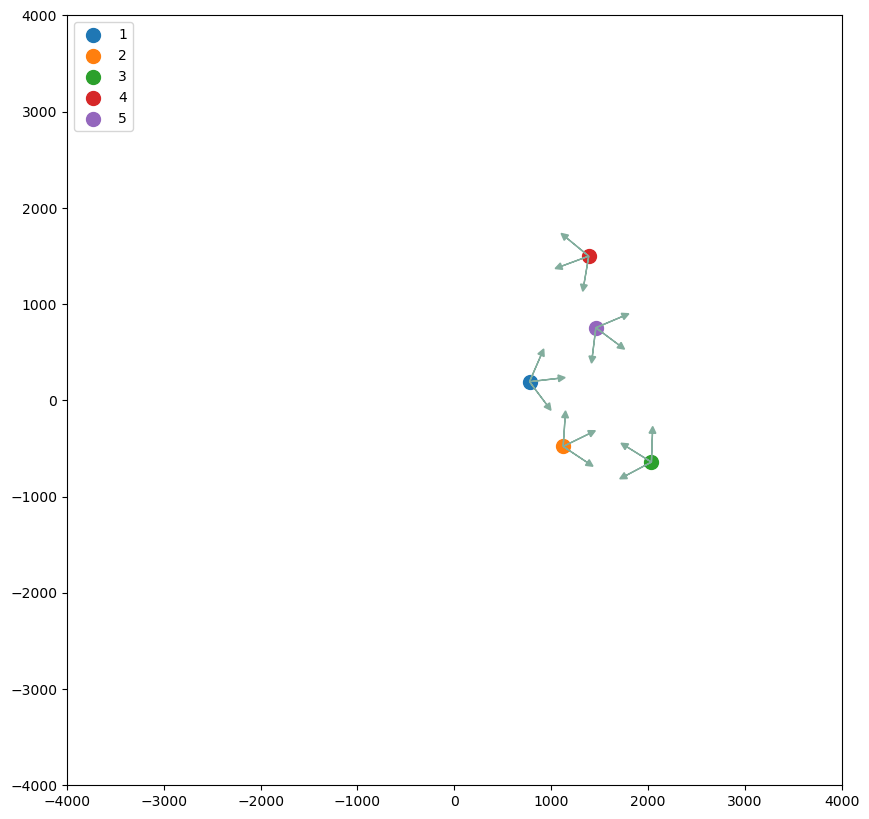

47155


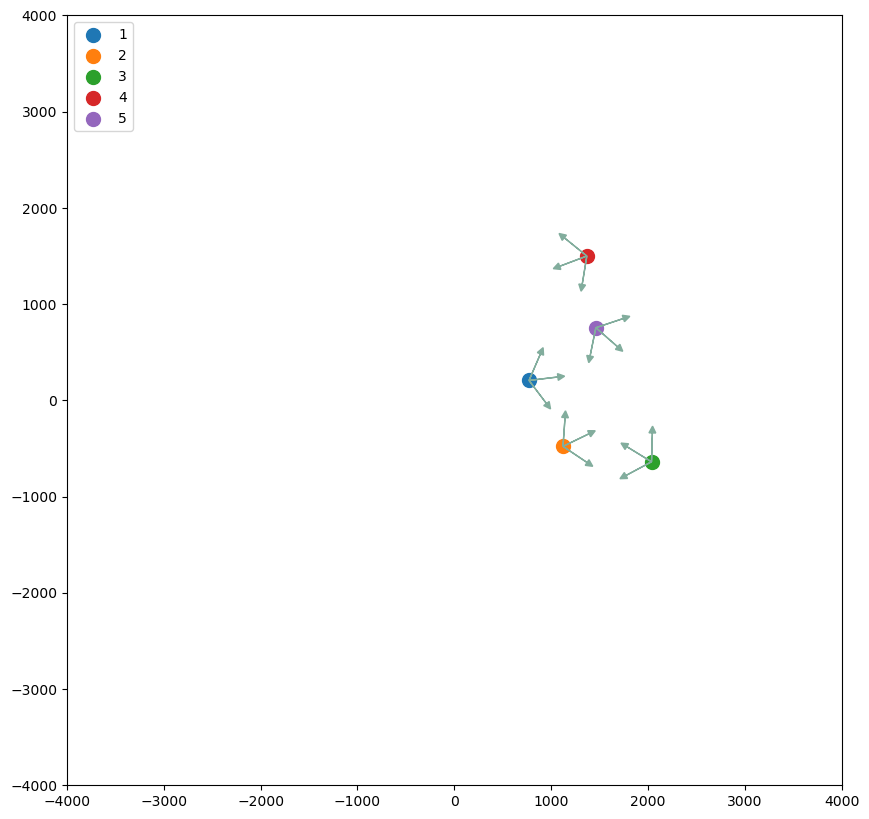

47160


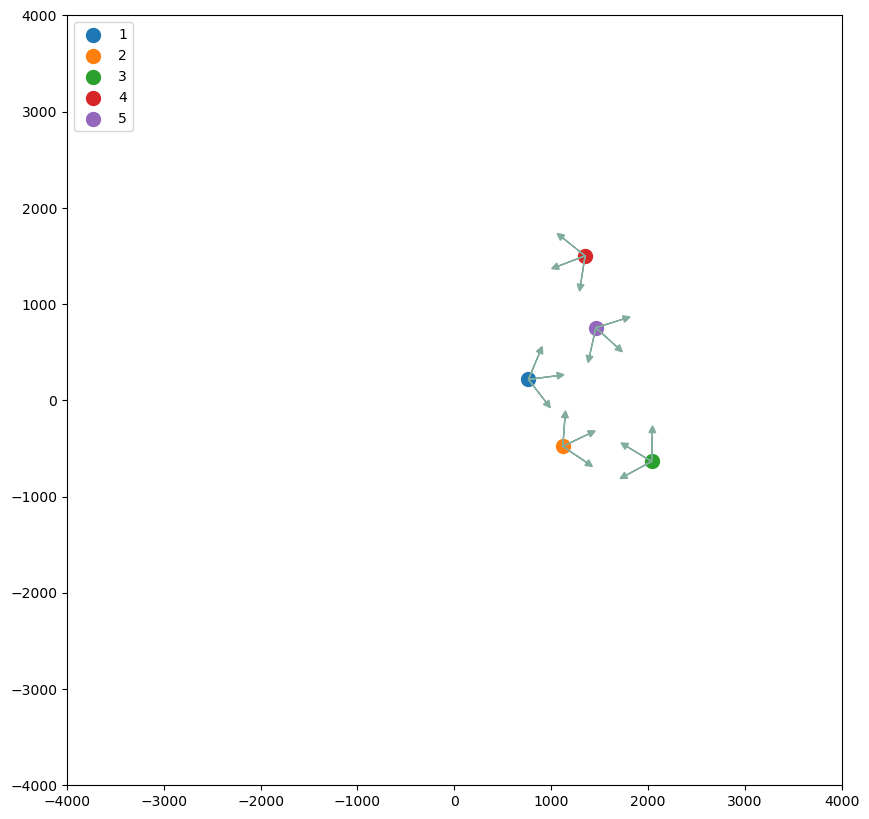

47165


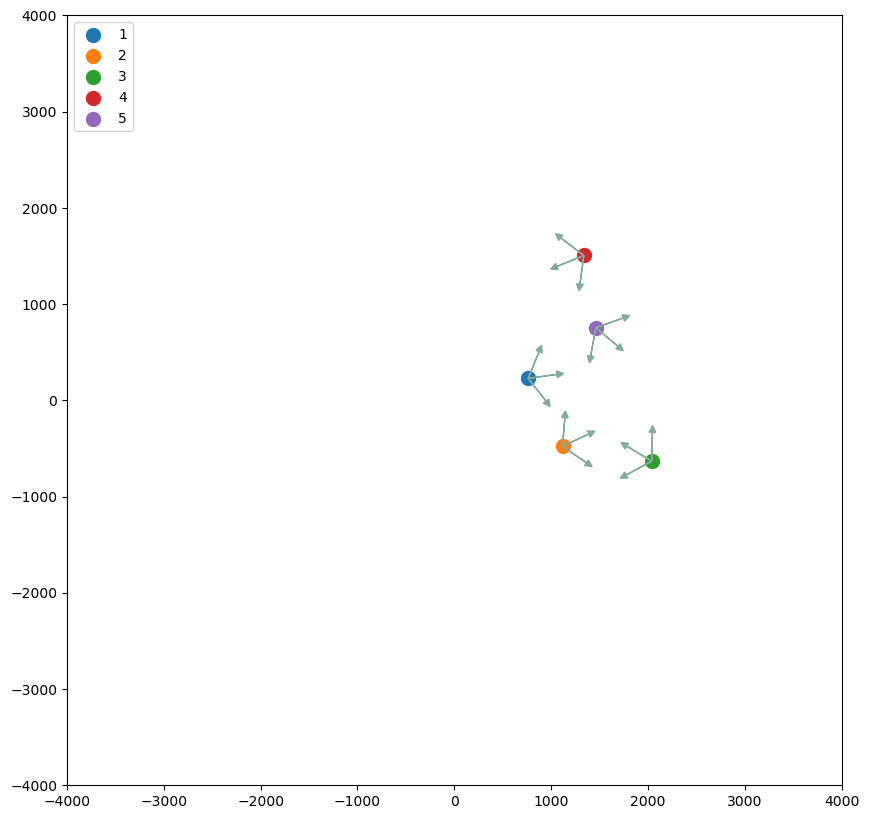

47170


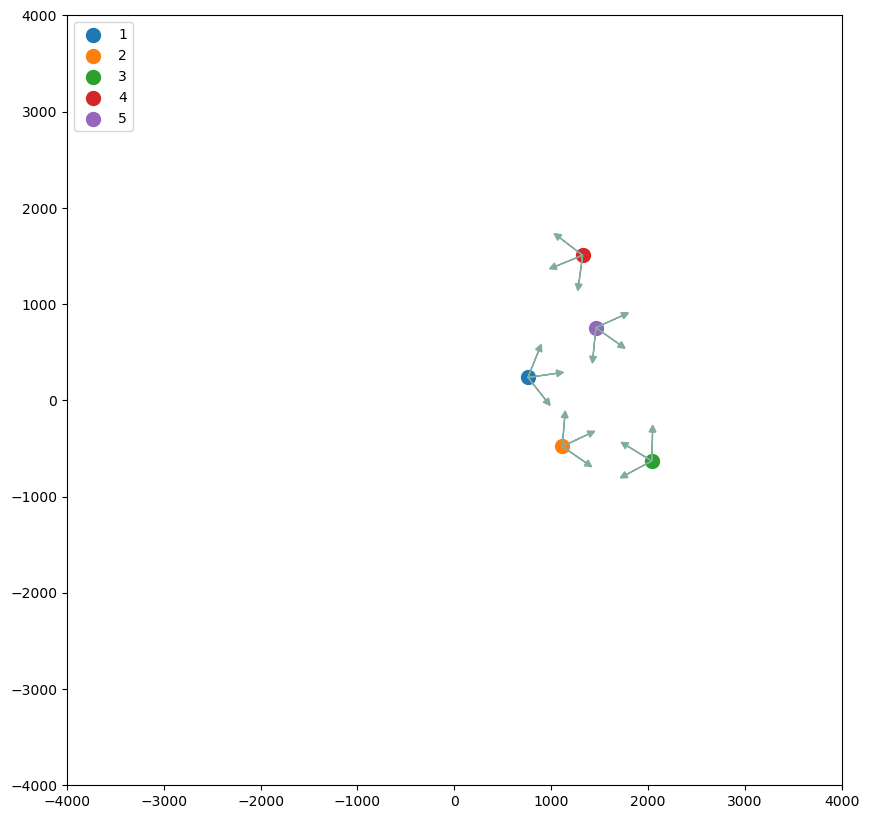

47175


In [904]:
fov_angle = math.radians(60)
start = 47080
end = 47180
length = 300

for index, row in data_df.iloc[start:end:5].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))

    for i in range(1, 6):
        label = str(i)
        x = row[f"{label}TX"]
        y = row[f"{label}TY"]
        yaw = row[f"{label}RZ"]

        plt.scatter(x, y, s=100, label=label)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )

    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()
    print(index)


### Transformations

In [5]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

#for group
# grp = data_df.groupby(by=["GROUP"])

# for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]

for i in range(1,6):
    x = '%sTX'%i
    y = '%sTY'%i
    z = '%sTZ'%i
    p = '%sRX'%i
    r = '%sRY'%i
    yaw = '%sRZ'%i

    for j in range(1,6):
        x1 = '%sTX'%j
        y1 = '%sTY'%j
        z1 = '%sTZ'%j
        p1 = '%sRX'%j
        r1 = '%sRY'%j
        yaw1 = '%sRZ'%j
        if i == j:
            continue
        print(x, x1)
        data_df["%s%sx"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
        data_df["%s%sy"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
        data_df["%s%sz"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
        print("%s%sz"%(i,j))



1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


In [6]:
data_df.columns

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP', '12x', '12y', '12z', '13x', '13y', '13z',
       '14x', '14y', '14z', '15x', '15y', '15z', '21x', '21y', '21z', '23x',
       '23y', '23z', '24x', '24y', '24z', '25x', '25y', '25z', '31x', '31y',
       '31z', '32x', '32y', '32z', '34x', '34y', '34z', '35x', '35y', '35z',
       '41x', '41y', '41z', '42x', '42y', '42z', '43x', '43y', '43z', '45x',
       '45y', '45z', '51x', '51y', '51z', '52x', '52y', '52z', '53x', '53y',
       '53z', '54x', '54y', '54z'],
      dtype='object')

In [7]:
data_df = data_df.fillna(0)
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0 -0.531101 -0.333302 -89.182247  -254.536621   
1           2          0 -0.530232 -0.333210 -89.183413  -254.822189   
2           3          0 -0.529697 -0.333456 -89.184796  -255.115692   
3           4          0 -0.529533 -0.334137 -89.186532  -255.348618   
4           5          0 -0.529070 -0.334084 -89.188290  -255.564484   
...       ...        ...       ...       ...        ...          ...   
384290  59310          0  2.737314  1.189883 -88.472418   953.185486   
384291  59311          0  2.009243 -2.953588 -88.541000  1148.113281   
384292  59312          0  2.010661 -2.952954 -88.538241  1145.759155   
384293  59313          0  2.009497 -2.951181 -88.533041  1143.277710   
384294  59314          0  0.000000  0.000000   0.000000     0.000000   

                1TY          1TZ       2RX       2RY  ...         51z  \
0       -930.866882  1850.038452  0.000000  0.000000  ...  128.870366   
1       -933.103638  1850.221924  0.000000  0.000000  ...  129.678786   
2       -935.399841  1850.361450  0.000000  0.000000  ...  130.557816   
3       -937.724121  1850.489380  0.000000  0.000000  ...  133.015002   
4       -939.977295  1850.521240  0.000000  0.000000  ...  134.349344   
...             ...          ...       ...       ...  ...         ...   
384290  2367.276123  1779.521851  1.435446 -1.929540  ...  -36.971744   
384291  2257.092285  1739.421265  1.437920 -1.928547  ...  336.110700   
384292  2255.737305  1739.484863  1.490210 -1.879370  ...  337.723776   
384293  2254.541260  1739.586914  1.496017 -1.874628  ...  339.484101   
384294     0.000000     0.000000  1.501008 -1.870444  ...    0.000000   

                52x         52y         52z         53x         53y  \
0          0.000000    0.000000    0.000000  718.992601 -273.921295   
1          0.000000    0.000000    0.000000  720.125103 -270.833711   
2          0.000000    0.000000    0.000000  719.251538 -273.605260   
3          0.000000    0.000000    0.000000  718.652677 -274.866853   
4          0.000000    0.000000    0.000000  717.296388 -277.577330   
...             ...         ...         ...         ...         ...   
384290  1076.563064  841.679633  255.378811   73.895279  114.148967   
384291  -428.201656 -338.733992 -535.131920 -459.475936 -380.480572   
384292  -427.829952 -339.538612 -535.629140 -459.173395 -381.189007   
384293  -427.138175 -341.097578 -534.879806 -458.509393 -382.237655   
384294  -426.283489 -339.743203 -536.524302 -457.322718 -381.041715   

               53z         54x         54y         54z  
0        63.339033 -353.187455  656.414451  -39.424329  
1        63.329039 -357.653418  653.396103  -36.579108  
2        64.138318 -356.250263  653.256836  -37.013796  
3        65.821548 -356.202090  652.511822  -38.421894  
4        67.400642 -355.077462  652.339509  -40.729646  
...            ...         ...         ...         ...  
384290   64.833064    0.000000    0.000000    0.000000  
384291 -521.348356    0.000000    0.000000    0.000000  
384292 -520.896908    0.000000    0.000000    0.000000  
384293 -520.157663    0.000000    0.000000    0.000000  
384294 -522.130980  286.058498  140.216570  362.620712  

[384295 rows x 93 columns]

In [8]:
df_dist = df_dist.fillna(0)
df_dist

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0           0.000000      0.177126      0.326157      0.451580      0.000000   
1           0.000000      0.177566      0.326504      0.452135      0.000000   
2           0.000000      0.178016      0.326864      0.452783      0.000000   
3           0.000000      0.178471      0.327223      0.453387      0.000000   
4           0.000000      0.178916      0.327574      0.453914      0.000000   
...              ...           ...           ...           ...           ...   
384290      0.207852      0.044680      0.000000      0.023605      0.207852   
384291      0.175072      0.234124      0.000000      0.124294      0.175072   
384292      0.175262      0.234266      0.000000      0.124499      0.175262   
384293      0.175397      0.234397      0.000000      0.124804      0.175397   
384294      0.000000      0.000000      0.000000      0.000000      0.000000   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0           0.000000      0.000000      0.000000      0.177126      0.000000   
1           0.000000      0.000000      0.000000      0.177566      0.000000   
2           0.000000      0.000000      0.000000      0.178016      0.000000   
3           0.000000      0.000000      0.000000      0.178471      0.000000   
4           0.000000      0.000000      0.000000      0.178916      0.000000   
...              ...           ...           ...           ...           ...   
384290      0.190196      0.000000      0.194140      0.044680      0.190196   
384291      0.006081      0.000000      0.107014      0.234124      0.006081   
384292      0.006067      0.000000      0.107083      0.234266      0.006067   
384293      0.006039      0.000000      0.107038      0.234397      0.006039   
384294      0.006021      0.177707      0.107038      0.000000      0.006021   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...      0.000000      0.232979      0.112358      0.451580   
1       ...      0.000000      0.232987      0.112251      0.452135   
2       ...      0.000000      0.233000      0.112130      0.452783   
3       ...      0.000000      0.233012      0.112034      0.453387   
4       ...      0.000000      0.233024      0.111944      0.453914   
...     ...           ...           ...           ...           ...   
384290  ...      0.000000      0.000000      0.000000      0.023605   
384291  ...      0.000000      0.000000      0.000000      0.124294   
384292  ...      0.000000      0.000000      0.000000      0.124499   
384293  ...      0.000000      0.000000      0.000000      0.124804   
384294  ...      0.177707      0.199556      0.066716      0.000000   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0           0.000000      0.139680      0.112358       0  study6       1  
1           0.000000      0.139671      0.112251       1  study6       2  
2           0.000000      0.139712      0.112130       2  study6       3  
3           0.000000      0.139716      0.112034       3  study6       4  
4           0.000000      0.139687      0.111944       4  study6       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.194140      0.026613      0.000000  384290  study1   59310  
384291      0.107014      0.140618      0.000000  384291  study1   59311  
384292      0.107083      0.140604      0.000000  384292  study1   59312  
384293      0.107038      0.140510      0.000000  384293  study1   59313  
384294      0.107038      0.140502      0.066716  384294  study1   59314  

[384295 rows x 23 columns]

### Angle/FOV

In [9]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):    
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[df['%sx'%id] < 0] = 0
    
    return series


# grp = data_df.groupby(by=["GROUP"])

# # for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]
#     df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
fov_df["Frame"] = data_df['Frame']

    
for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))


for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])

        soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
        soc_eng['GROUP'] = data_df['GROUP']
        # soc_eng['GROUP'] = "4"


soc_eng = soc_eng.fillna(0)
soc_eng

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
0           1                    0.0  study6                    0.0   
1           2                    0.0  study6                    0.0   
2           3                    0.0  study6                    0.0   
3           4                    0.0  study6                    0.0   
4           5                    0.0  study6                    0.0   
...       ...                    ...     ...                    ...   
384290  59310                    1.0  study1                    1.0   
384291  59311                    0.0  study1                    0.0   
384292  59312                    0.0  study1                    0.0   
384293  59313                    0.0  study1                    0.0   
384294  59314                    0.0  study1                    0.0   

        social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                         0.0                    0.0                    0.0   
4                         0.0                    0.0                    0.0   
...                       ...                    ...                    ...   
384290                    0.0                    1.0                    1.0   
384291                    0.0                    0.0                    1.0   
384292                    0.0                    0.0                    1.0   
384293                    0.0                    0.0                    1.0   
384294                    0.0                    0.0                    0.0   

        social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                         0.0                    0.0                    0.0   
4                         0.0                    0.0                    0.0   
...                       ...                    ...                    ...   
384290                    1.0                    0.0                    1.0   
384291                    1.0                    0.0                    1.0   
384292                    1.0                    0.0                    1.0   
384293                    1.0                    0.0                    1.0   
384294                    1.0                    1.0                    1.0   

        ...  social_engagement_3_4  social_engagement_3_5  \
0       ...                    1.0                    1.0   
1       ...                    1.0                    1.0   
2       ...                    1.0                    1.0   
3       ...                    1.0                    1.0   
4       ...                    1.0                    1.0   
...     ...                    ...                    ...   
384290  ...                    0.0                    0.0   
384291  ...                    0.0                    0.0   
384292  ...                    0.0                    0.0   
384293  ...                    0.0                    0.0   
384294  ...                    0.0                    0.0   

        social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
0                         1.0                    0.0               0.928722   
1                         1.0                    0.0               0.927751   
2                         1.0                    0.0               0.927007   
3                         1.0                    0.0               0.926488   
4                         1.0                    0.0               0.926247   
...                       ...                    .

In [506]:
soc_eng.describe()

Frame  social_engagement_1_2  social_engagement_1_3  \
count  384295.000000          384295.000000          384295.000000   
mean    33389.692973               0.401210               0.425197   
std     20627.230567               0.471542               0.474427   
min         1.000000               0.000000               0.000000   
25%     16013.000000               0.000000               0.000000   
50%     32025.000000               0.000000               0.000774   
75%     48348.000000               1.000000               1.000000   
max     80118.000000               1.000000               1.000000   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.359776               0.309819               0.322464   
std                 0.460699               0.430800               0.450864   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               0.879272               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
count          384295.000000          384295.000000          384295.000000   
mean                0.285817               0.281296               0.351521   
std                 0.435607               0.433602               0.460612   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.984737               0.898928               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_3_1  ...  social_engagement_3_4  \
count          384295.000000  ...          384295.000000   
mean                0.386930  ...               0.423378   
std                 0.470562  ...               0.474007   
min                 0.000000  ...               0.000000   
25%                 0.000000  ...               0.000000   
50%                 0.000000  ...               0.004895   
75%                 1.000000  ...               1.000000   
max                 1.000000  ...               1.000000   

       social_engagement_3_5  social_engagement_4_1  social_engagement_4_2  \
count          384295.000000          384295.000000          384295.000000   
mean                0.406491               0.368876               0.458739   
std                 0.463157               0.462506               0.477937   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.151535   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_4_3  social_engagement_4_5  social_engagement_5_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.413946               0.328056               0.356137   
std                 0.473430               0.455417               0.451320   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_5_2  s

### Social Engagement Metric 

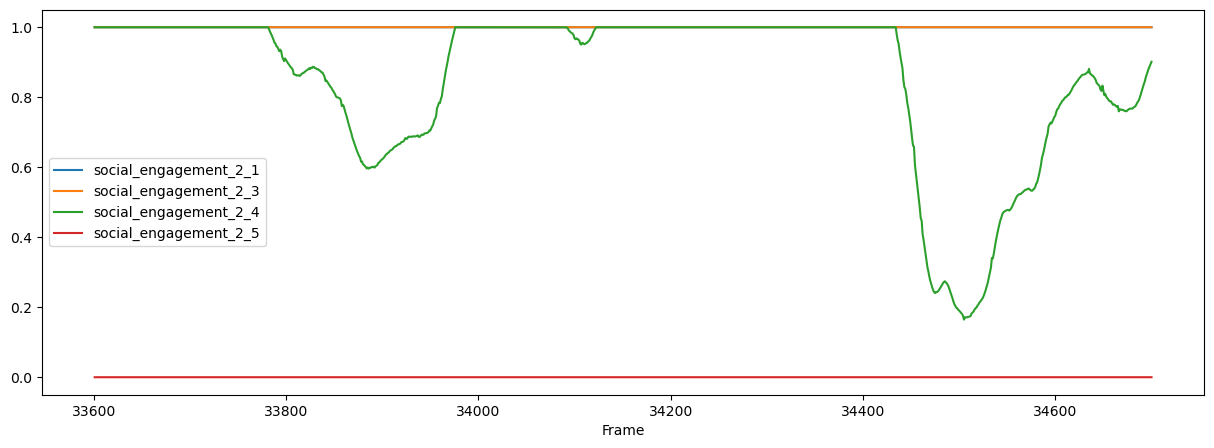

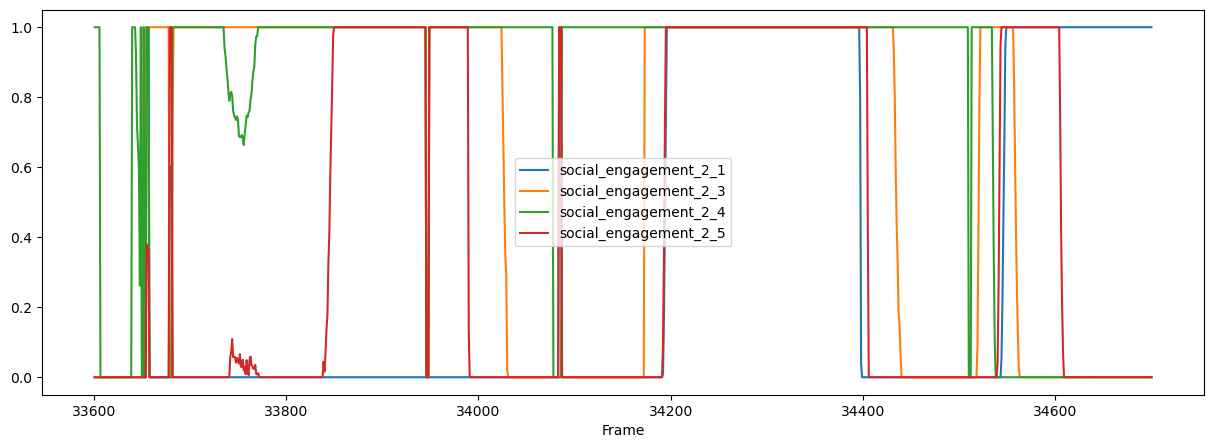

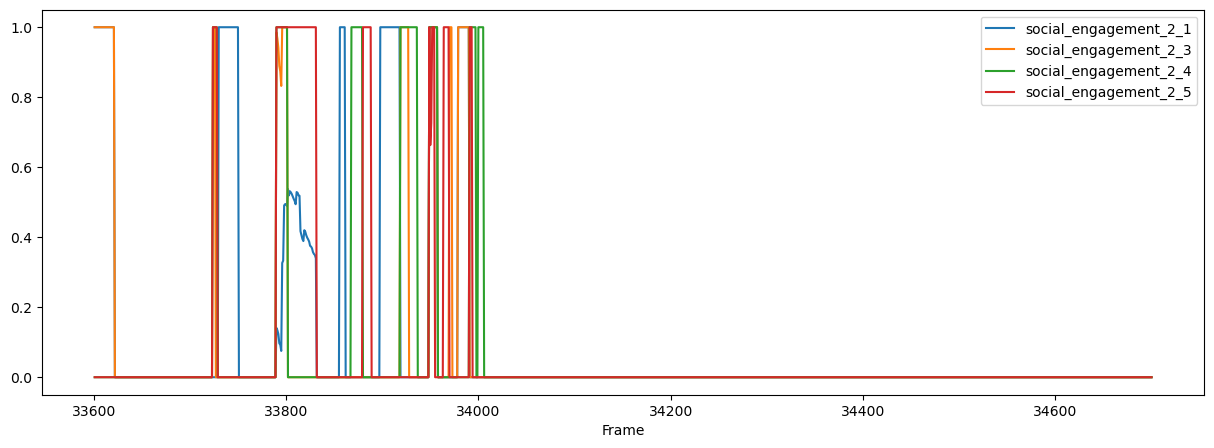

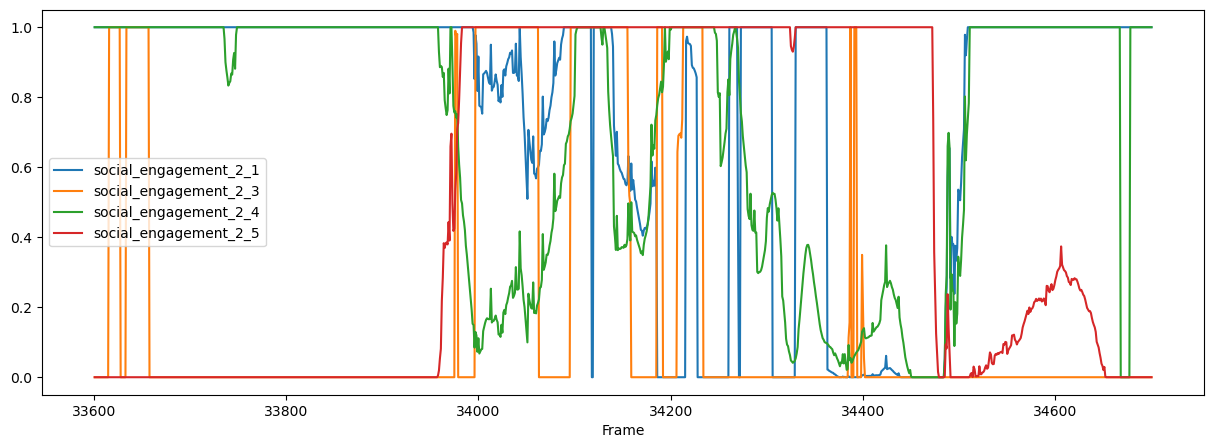

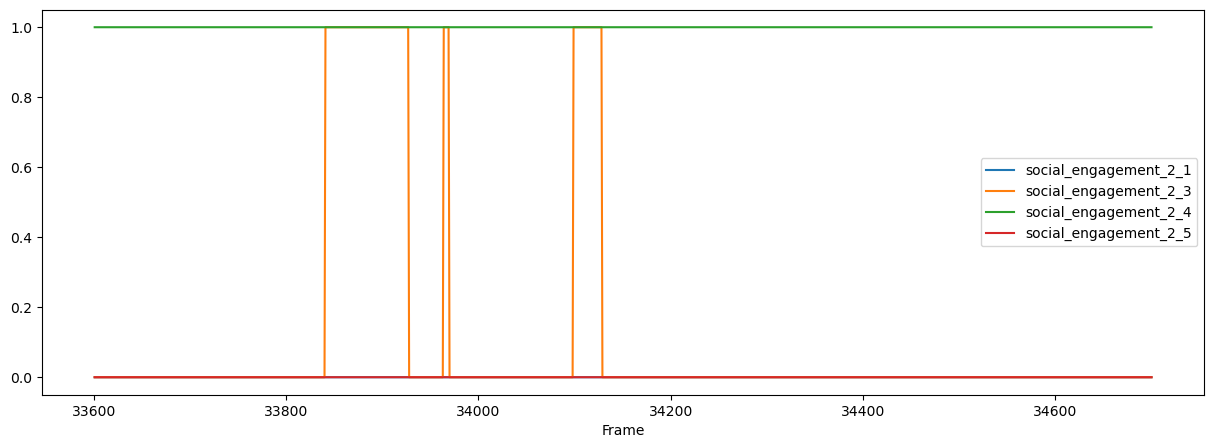

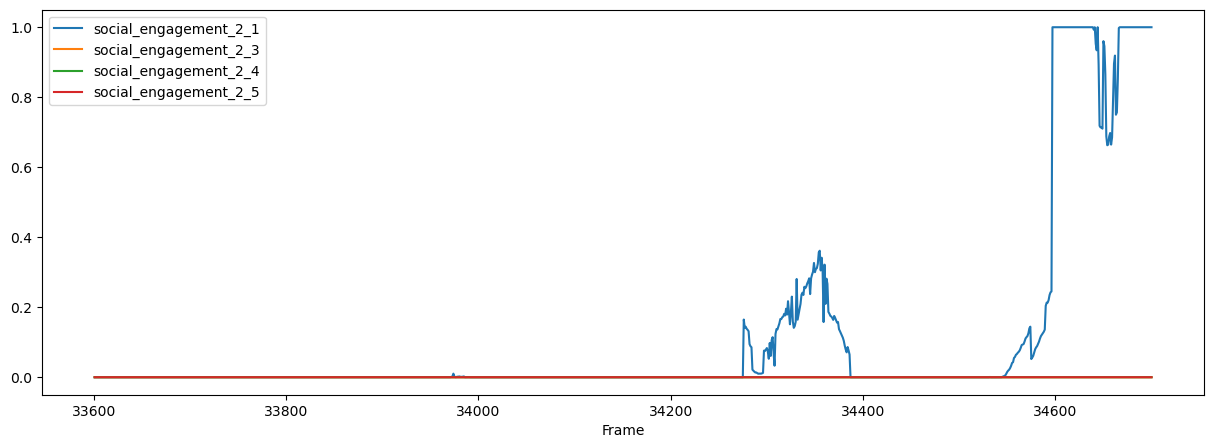

In [507]:
grouped = soc_eng.groupby('GROUP')

for name, group in grouped:
#     group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
    group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


# soc_eng.iloc[1000:10000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))    

In [10]:
eng_df = pd.DataFrame()  

eng_df['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].max(axis=1)
eng_df['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].max(axis=1, numeric_only=True)
eng_df['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].max(axis=1)
eng_df['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].max(axis=1)
eng_df['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].max(axis=1)
eng_df['GROUP'] = soc_eng["GROUP"]
eng_df = eng_df.reset_index() 
# eng_df = eng_df.drop('index', axis=1)

eng_df = eng_df.fillna(0)
eng_df
# print(soc_eng.describe())
# print(eng_df.describe())

index  soc_average_1  soc_average_2  soc_average_3  soc_average_4  \
0            0            0.0            0.0            1.0            1.0   
1            1            0.0            0.0            1.0            1.0   
2            2            0.0            0.0            1.0            1.0   
3            3            0.0            0.0            1.0            1.0   
4            4            0.0            0.0            1.0            1.0   
...        ...            ...            ...            ...            ...   
384290  384290            1.0            1.0            0.0            0.0   
384291  384291            0.0            1.0            0.0            0.0   
384292  384292            0.0            1.0            0.0            0.0   
384293  384293            0.0            1.0            0.0            0.0   
384294  384294            0.0            1.0            0.0            0.0   

        soc_average_5   GROUP  
0                 1.0  study6  
1                 1.0  study6  
2                 1.0  study6  
3                 1.0  study6  
4                 1.0  study6  
...               ...     ...  
384290            1.0  study1  
384291            1.0  study1  
384292            1.0  study1  
384293            1.0  study1  
384294            1.0  study1  

[384295 rows x 7 columns]

In [339]:
###smoothing, rolling window average
# eng_df = eng_df.rolling(window=30).mean() 

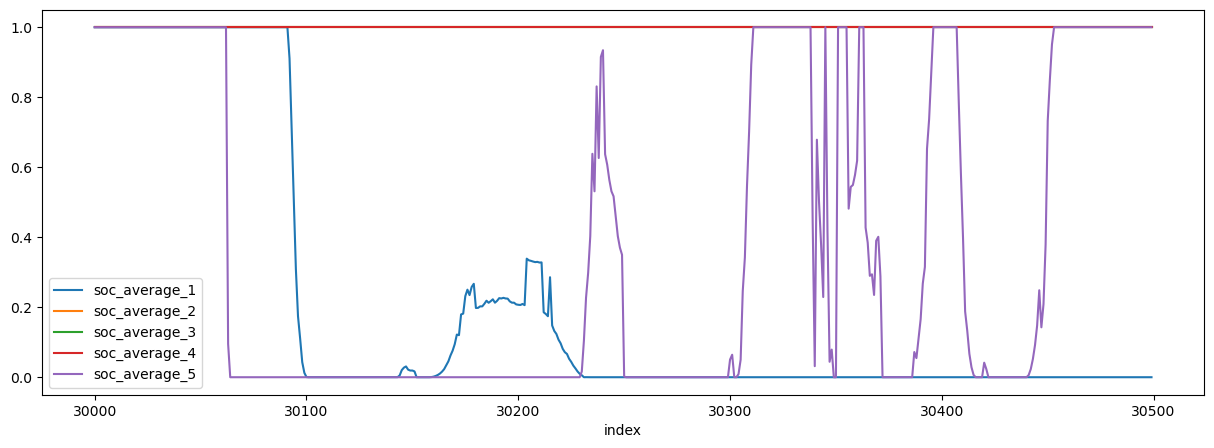

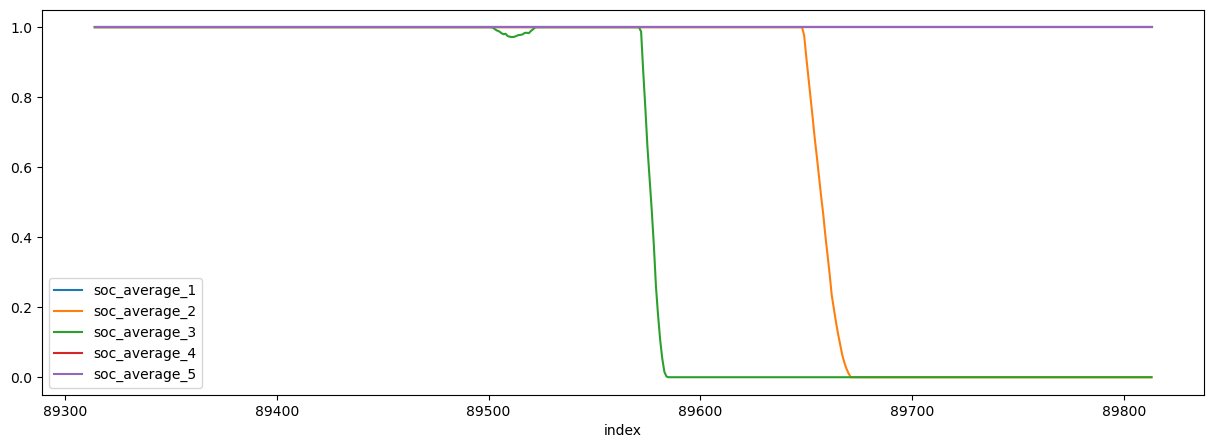

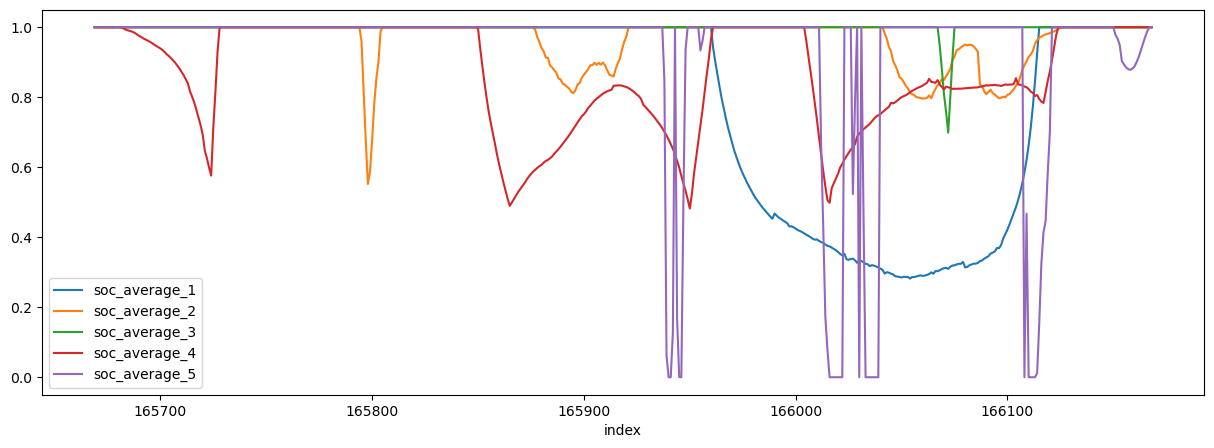

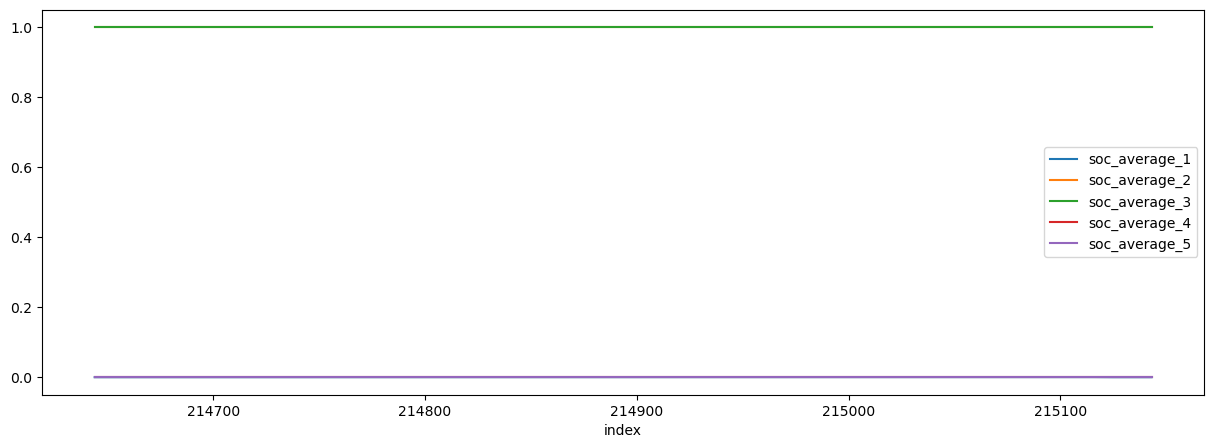

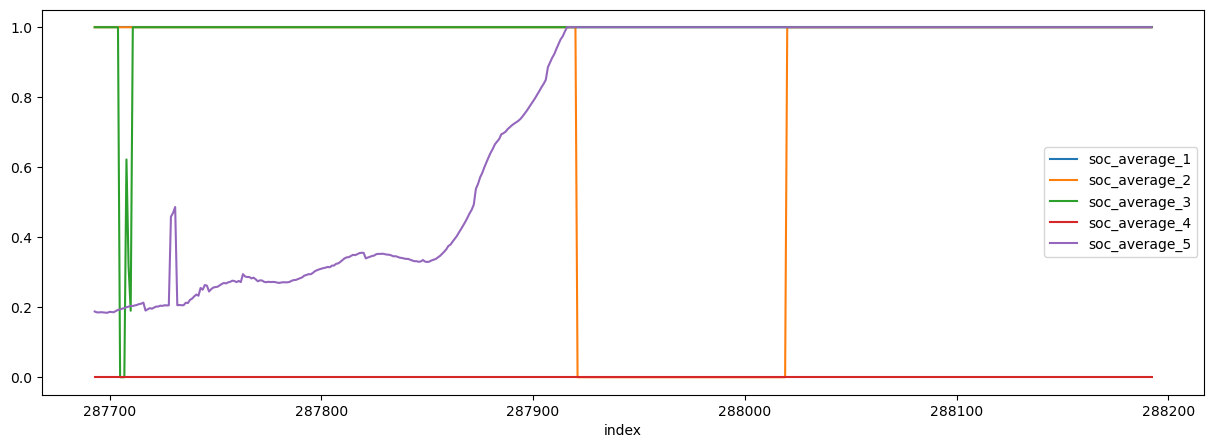

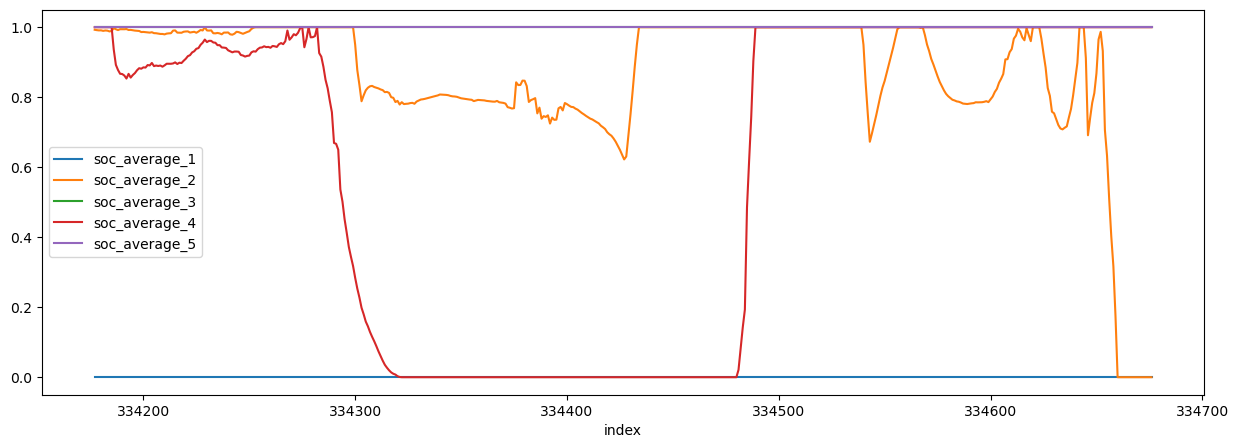

In [509]:
grouped = eng_df.groupby('GROUP')

for name, group in grouped:
    group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))
    
    
# eng_df.iloc[40000:40200][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

# eng_df.iloc[31550:33000][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

## Create Video

In [11]:
# #! python3

# import pandas as pd
# import matplotlib.pyplot as plt
# from pathlib import Path
# import numpy as np
# import math
# import numpy as np
# import matplotlib.animation as animation

# VICON_FPS = 100
# VIDEO_FPS = 20

# start = 601 * VIDEO_FPS
# end =  800 * VIDEO_FPS  # 10sec video

# #####################################################

# csv_files = Path(".").glob("study6H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# # convert df index to time periods
# data_df.set_index(
#     pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
# )

# # resample df to target FPS
# data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


# data_df['1RZ'] = data_df['1RZ'] - 90
# # data_df['2RZ'] = data_df['2RZ'] - 90
# data_df['3RZ'] = data_df['3RZ'] + 90
# data_df['4RZ'] = data_df['4RZ'] - 90
# data_df['5RZ'] = data_df['5RZ'] - 90



# fov_angle = math.radians(60)

# length = 500

# fig, ax = plt.subplots(figsize=(10, 10))


# def init():
#     plt.legend(loc="upper left")

#     plt.xlim(-5000, 5000)
#     plt.ylim(-5000, 5000)


# def update(frame):

#     print("Done %s%%" % (100 * (frame - start) / (end - start)))

#     row = data_df.iloc[frame]

#     x = row["1TX"]
#     y = row["1TY"]
#     yaw = row["1RZ"]

#     fig.clear()

#     plt.xlim(-5000, 5000)
#     plt.ylim(-5000, 5000)

#     plt.scatter(x, y, s=100, label="1")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["2TX"]
#     y = row["2TY"]
#     yaw = row["2RZ"]
#     plt.scatter(x, y, s=100, label="2")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["3TX"]
#     y = row["3TY"]
#     yaw = row["3RZ"]
#     plt.scatter(x, y, s=100, label="3")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["4TX"]
#     y = row["4TY"]
#     yaw = row["4RZ"]
#     plt.scatter(x, y, s=100, label="4")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["5TX"]
#     y = row["5TY"]
#     yaw = row["5RZ"]
#     plt.scatter(x, y, s=100, label="5")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         600 * np.cos(yaw - fov_angle),
#         600 * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         600 * np.cos(yaw + fov_angle),
#         600 * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     plt.legend(loc="upper left")
#     plt.title(frame)
    
# ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
# writergif = animation.PillowWriter(fps=20)
# ani.save('study6_4.gif',writer=writergif)


# # ani.save("test.mp4", fps=VIDEO_FPS)


## Using human verified interaction starting points

In [12]:
from pathlib import Path


def load_and_process_group_file(file_path, group_name):
    ann = os.path.basename(file_path)[-5]
    print(file_path)
    elan_df = pd.read_csv(file_path, sep='\t').fillna(0)
    data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
    for item in data:
        item.insert(0, group_name)
        item.insert(-1, ann)
    return data

# List of group files and their respective group names
group_files = [
    ("newannotations/group1H.txt", "1"),
    ("newannotations/group1P.txt", "1"),
    ("newannotations/group2D.txt", "2"),
    ("newannotations/group2H.txt", "2"),
    ("newannotations/group3E.txt", "3"),
    ("newannotations/group3W.txt", "3"),
    ("newannotations/group4E.txt", "4"),
    ("newannotations/group4W.txt", "4"),
    ("newannotations/group5D.txt", "5"),
    ("newannotations/group5S.txt", "5"),
    ("newannotations/group6P.txt", "6"),
    ("newannotations/group6S.txt", "6")
]

# Load and process each group file
data_list = [load_and_process_group_file(file_path, group_name) for file_path, group_name in group_files]


# Merge all data from different groups
merged_data = list(merge(*data_list))


# Create the final DataFrame
columns = ['GROUP', 'Participant', 'Frame', 'Annotator', 'Interacted']
group_df = pd.DataFrame(merged_data, columns=columns)
group_df = group_df.sort_values('Participant')
group_df = group_df.reset_index()
group_df = group_df.drop('index', axis=1)
group_df
# group_df[group_df['GROUP']=='5']

newannotations/group1H.txt
newannotations/group1P.txt
newannotations/group2D.txt
newannotations/group2H.txt
newannotations/group3E.txt
newannotations/group3W.txt
newannotations/group4E.txt
newannotations/group4W.txt
newannotations/group5D.txt
newannotations/group5S.txt
newannotations/group6P.txt
newannotations/group6S.txt


GROUP Participant  Frame Annotator Interacted
0       1           1   1256         P          5
1       4           1   3491         W        3 5
2       4           1   2664         W        3 5
3       4           1   1928         W        3 5
4       6           1   7434         P    2 3 4 5
..    ...         ...    ...       ...        ...
456     4           5   6617         W    1 2 3 4
457     4           5   9118         W    1 2 3 4
458     4           5   9846         W    1 2 3 4
459     4           5   2632         W        1 3
460     6           5  10403         P        2 3

[461 rows x 5 columns]

In [13]:
# Convert 'Interacted' column to lists of integers
# group_df['Interactedd'] = group_df['Interacted'].str.split()


# Function to check for overlap within a 100 frame leeway
def check_overlap(frames1, frames2):
    frames1 = int(frames1)
    frames2 = int(frames2)

#     frames1 =  list(map(int, frames1))
#     frames2 =  list(map(int, frames2))
#     for frame1 in frames1:
#         for frame2 in frames2:
    if abs(frames1 - frames2) <= 100:
        return True
    return False

# Iterate over each pair of rows and check for overlap
overlapping_pairs = []
for i in range(len(group_df)):
    for j in range(i + 1, len(group_df)):
        if group_df.loc[i, 'GROUP'] == group_df.loc[j, 'GROUP'] and \
           group_df.loc[i, 'Participant'] == group_df.loc[j, 'Participant'] and \
            group_df.loc[i, 'Annotator'] != group_df.loc[j, 'Annotator'] and \
               check_overlap(group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']):
            overlapping_pairs.append((group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']))

# Print overlapping pairs
# print("Overlapping pairs:")
# for pair in overlapping_pairs:
#     print(pair)

# print(overlapping_pairs)
    
overlapping_pairs = [element for innerList in overlapping_pairs for element in innerList]

group_df = group_df[group_df['Frame'].isin(overlapping_pairs)]
group_df = group_df.reset_index() 
group_df


index GROUP Participant  Frame Annotator Interacted
0        2     4           1   2664         W        3 5
1        3     4           1   1928         W        3 5
2        5     3           1   9115         W    2 3 4 5
3        6     3           1   9076         E    2 3 4 5
4        7     3           1   8669         W          4
..     ...   ...         ...    ...       ...        ...
247    456     4           5   6617         W    1 2 3 4
248    457     4           5   9118         W    1 2 3 4
249    458     4           5   9846         W    1 2 3 4
250    459     4           5   2632         W        1 3
251    460     6           5  10403         P        2 3

[252 rows x 6 columns]

In [14]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df
# group_df[group_df['GROUP']=='5']

index GROUP Participant  Frame Annotator Interacted
0        2     4           1  13319         W        3 5
1        3     4           1   9640         W        3 5
2        5     3           1  45575         W    2 3 4 5
3        6     3           1  45380         E    2 3 4 5
4        7     3           1  43345         W          4
..     ...   ...         ...    ...       ...        ...
247    456     4           5  33085         W    1 2 3 4
248    457     4           5  45590         W    1 2 3 4
249    458     4           5  49230         W    1 2 3 4
250    459     4           5  13160         W        1 3
251    460     6           5  52015         P        2 3

[252 rows x 6 columns]

In [15]:
for index, row in group_df.iterrows():
    range_frame = []
    frame = row['Frame']
    upp = (frame + 50)
    down = (frame - 50)
    for i in range(down, upp):
        range_frame.append(i)
    
# print(range_frame)
    val = group_df.isin({'Frame':(range_frame)})
print(val)



# for col in group_df:
# for frame in group_df['Frame']:
#     print(frame)


     index  GROUP  Participant  Frame  Annotator  Interacted
0    False  False        False  False      False       False
1    False  False        False  False      False       False
2    False  False        False  False      False       False
3    False  False        False  False      False       False
4    False  False        False  False      False       False
..     ...    ...          ...    ...        ...         ...
247  False  False        False  False      False       False
248  False  False        False  False      False       False
249  False  False        False  False      False       False
250  False  False        False  False      False       False
251  False  False        False   True      False       False

[252 rows x 6 columns]


In [16]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist = df_dist.fillna(0)
df_dist


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0           0.000000      0.177126      0.326157      0.451580      0.000000   
1           0.000000      0.177566      0.326504      0.452135      0.000000   
2           0.000000      0.178016      0.326864      0.452783      0.000000   
3           0.000000      0.178471      0.327223      0.453387      0.000000   
4           0.000000      0.178916      0.327574      0.453914      0.000000   
...              ...           ...           ...           ...           ...   
384290      0.207852      0.044680      0.000000      0.023605      0.207852   
384291      0.175072      0.234124      0.000000      0.124294      0.175072   
384292      0.175262      0.234266      0.000000      0.124499      0.175262   
384293      0.175397      0.234397      0.000000      0.124804      0.175397   
384294      0.000000      0.000000      0.000000      0.000000      0.000000   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0           0.000000      0.000000      0.000000      0.177126      0.000000   
1           0.000000      0.000000      0.000000      0.177566      0.000000   
2           0.000000      0.000000      0.000000      0.178016      0.000000   
3           0.000000      0.000000      0.000000      0.178471      0.000000   
4           0.000000      0.000000      0.000000      0.178916      0.000000   
...              ...           ...           ...           ...           ...   
384290      0.190196      0.000000      0.194140      0.044680      0.190196   
384291      0.006081      0.000000      0.107014      0.234124      0.006081   
384292      0.006067      0.000000      0.107083      0.234266      0.006067   
384293      0.006039      0.000000      0.107038      0.234397      0.006039   
384294      0.006021      0.177707      0.107038      0.000000      0.006021   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...      0.000000      0.232979      0.112358      0.451580   
1       ...      0.000000      0.232987      0.112251      0.452135   
2       ...      0.000000      0.233000      0.112130      0.452783   
3       ...      0.000000      0.233012      0.112034      0.453387   
4       ...      0.000000      0.233024      0.111944      0.453914   
...     ...           ...           ...           ...           ...   
384290  ...      0.000000      0.000000      0.000000      0.023605   
384291  ...      0.000000      0.000000      0.000000      0.124294   
384292  ...      0.000000      0.000000      0.000000      0.124499   
384293  ...      0.000000      0.000000      0.000000      0.124804   
384294  ...      0.177707      0.199556      0.066716      0.000000   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0           0.000000      0.139680      0.112358       0  study6       1  
1           0.000000      0.139671      0.112251       1  study6       2  
2           0.000000      0.139712      0.112130       2  study6       3  
3           0.000000      0.139716      0.112034       3  study6       4  
4           0.000000      0.139687      0.111944       4  study6       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.194140      0.026613      0.000000  384290  study1   59310  
384291      0.107014      0.140618      0.000000  384291  study1   59311  
384292      0.107083      0.140604      0.000000  384292  study1   59312  
384293      0.107038      0.140510      0.000000  384293  study1   59313  
384294      0.107038      0.140502      0.066716  384294  study1   59314  

[384295 rows x 23 columns]

### Interaction Profiles

In [17]:
def calculate_social_engagement(df_dist, eng_df, window_size, int_df, temp_df, opp_df):
    grp = eng_df.groupby(by=["GROUP"])

    for group, data in grp:
#         print(group)
        df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
        group_dff = group_df.loc[group_df['GROUP'] == group[-1]]
        group_frames = group_dff['Frame']
        df_filtered = df_dist_g[df_dist_g['Frame2'].isin(group_frames)]
        
        soc_engg = soc_eng.loc[soc_eng['GROUP'] == group]
        
        for index, row in df_filtered.iterrows():
            last_index = -window_size
            count = 0   
            selector = index

            g_row = group_dff[group_dff['Frame'] == row['Frame2']]
            g_par = g_row['Participant'].values[0]
            g_int = g_row['Interacted'].values[0].rstrip()
            
            
            if len(g_int) < 2:
                if selector and index >= (last_index + window_size):
                    last_index = index
                    count += 1

                    for window_offset in range(-window_size, window_size):
                        frame_idx = row["Frame2"] + window_offset
                        frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                        if g_par != g_int:
                            nem = f'social_engagement_{g_par}_{g_int}'
                            int_pps = frames[f'social_engagement_{g_par}_{g_int}'].values[0]
                            
                            opp_nem = f'social_engagement_{g_int}_{g_par}'
                            opp_pps = frames[f'social_engagement_{g_int}_{g_par}'].values[0]

                            for _, roww in frames.iterrows():
                                ro = pd.Series([g_par, window_offset, int_pps, nem, group, frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                temp_df = pd.concat([temp_df, ro.to_frame().T])

                                opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group, frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                opp_df = pd.concat([opp_df, opp_ro.to_frame().T])

            else:
                res = g_int.split() 
                for par in res:
                    if selector and index >= (last_index + window_size):
                        last_index = index
                        count += 1

                        for window_offset in range(-window_size, window_size):
                            frame_idx = row["Frame2"] + window_offset
                            frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                            if g_par != par:
                                nem = f'social_engagement_{g_par}_{par}'
                                int_pps = frames[f'social_engagement_{g_par}_{par}'].values[0]

                                opp_nem = f'social_engagement_{par}_{g_par}'
                                opp_pps = frames[f'social_engagement_{par}_{g_par}'].values[0]

                                for _, roww in frames.iterrows():
                                    ro = pd.Series([g_par, window_offset, int_pps, nem, group, frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                    temp_df = pd.concat([temp_df, ro.to_frame().T])

                                    opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group, frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                    opp_df = pd.concat([opp_df, opp_ro.to_frame().T])
    return temp_df, opp_df

# Create empty DataFrames
temp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
opp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])


# Define the window size
WINDOW_SIZE = 50

# Call the function
int_df, opp_df = calculate_social_engagement(df_dist, eng_df, WINDOW_SIZE, int_df, temp_df, opp_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)

opp_df = opp_df.reset_index()
opp_df = opp_df.drop('index', axis=1)

int_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_5_1  study1    6005
1      5   -49               0.0  social_engagement_5_1  study1    6006
2      5   -48               0.0  social_engagement_5_1  study1    6007
3      5   -47               0.0  social_engagement_5_1  study1    6008
4      5   -46               0.0  social_engagement_5_1  study1    6009
...   ..   ...               ...                    ...     ...     ...
23595  2    45               0.0  social_engagement_2_3  study6   52324
23596  2    46               0.0  social_engagement_2_3  study6   52325
23597  2    47               0.0  social_engagement_2_3  study6   52326
23598  2    48               0.0  social_engagement_2_3  study6   52327
23599  2    49               0.0  social_engagement_2_3  study6   52328

[23600 rows x 6 columns]

In [18]:
opp_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_1_5  study1    6005
1      5   -49               0.0  social_engagement_1_5  study1    6006
2      5   -48               0.0  social_engagement_1_5  study1    6007
3      5   -47               0.0  social_engagement_1_5  study1    6008
4      5   -46               0.0  social_engagement_1_5  study1    6009
...   ..   ...               ...                    ...     ...     ...
23595  2    45               0.0  social_engagement_3_2  study6   52324
23596  2    46               0.0  social_engagement_3_2  study6   52325
23597  2    47               0.0  social_engagement_3_2  study6   52326
23598  2    48               0.0  social_engagement_3_2  study6   52327
23599  2    49               0.0  social_engagement_3_2  study6   52328

[23600 rows x 6 columns]

In [19]:
int_df = pd.concat([int_df, opp_df])
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
int_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_5_1  study1    6005
1      5   -49               0.0  social_engagement_5_1  study1    6006
2      5   -48               0.0  social_engagement_5_1  study1    6007
3      5   -47               0.0  social_engagement_5_1  study1    6008
4      5   -46               0.0  social_engagement_5_1  study1    6009
...   ..   ...               ...                    ...     ...     ...
47195  2    45               0.0  social_engagement_3_2  study6   52324
47196  2    46               0.0  social_engagement_3_2  study6   52325
47197  2    47               0.0  social_engagement_3_2  study6   52326
47198  2    48               0.0  social_engagement_3_2  study6   52327
47199  2    49               0.0  social_engagement_3_2  study6   52328

[47200 rows x 6 columns]

In [21]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
# int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])
int_df

ID Frame  social_engagement           soc_eng_with   GROUP OGINDEX
0       5   -50                0.0  social_engagement_5_1  study1    6005
1       5   -49                0.0  social_engagement_5_1  study1    6006
2       5   -48                0.0  social_engagement_5_1  study1    6007
3       5   -47                0.0  social_engagement_5_1  study1    6008
4       5   -46                0.0  social_engagement_5_1  study1    6009
...    ..   ...                ...                    ...     ...     ...
47195   2    45                0.0  social_engagement_3_2  study6   52324
47196   2    46                0.0  social_engagement_3_2  study6   52325
47197   2    47                0.0  social_engagement_3_2  study6   52326
47198   2    48                0.0  social_engagement_3_2  study6   52327
47199   2    49                0.0  social_engagement_3_2  study6   52328

[47200 rows x 6 columns]

In [22]:
# grp = int_df.groupby(by=["GROUP"])

# for group, data in grp:
interaction_profiles = int_df.groupby(['ID', 'Frame', 'GROUP']).agg({'social_engagement':['mean','std']})
print(interaction_profiles)
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
# interaction_profiles['GROUP'] = int_df['GROUP']
interaction_profiles

                social_engagement          
                             mean       std
ID Frame GROUP                             
1  -50   study1          0.347481  0.460369
         study2          0.440768  0.500212
         study3          0.350000  0.489360
         study4          0.280500  0.441673
         study5          0.214286  0.425815
...                           ...       ...
5   49   study2          0.448380  0.499697
         study3          0.357043  0.444666
         study4          0.189266  0.402298
         study5          0.519899  0.456314
         study6          0.243564  0.406861

[3000 rows x 2 columns]


ID  Frame   GROUP  social_engagement_mean  social_engagement_std
0      1    -50  study1                0.347481               0.460369
1      1    -50  study2                0.440768               0.500212
2      1    -50  study3                0.350000               0.489360
3      1    -50  study4                0.280500               0.441673
4      1    -50  study5                0.214286               0.425815
...   ..    ...     ...                     ...                    ...
2995   5     49  study2                0.448380               0.499697
2996   5     49  study3                0.357043               0.444666
2997   5     49  study4                0.189266               0.402298
2998   5     49  study5                0.519899               0.456314
2999   5     49  study6                0.243564               0.406861

[3000 rows x 5 columns]

In [23]:
int_df[int_df["Frame"] ==0].groupby('ID').count()


Frame  social_engagement  soc_eng_with  GROUP  OGINDEX
ID                                                        
1     102                102           102    102      102
2      96                 96            96     96       96
3      92                 92            92     92       92
4      98                 98            98     98       98
5      84                 84            84     84       84

<AxesSubplot:>

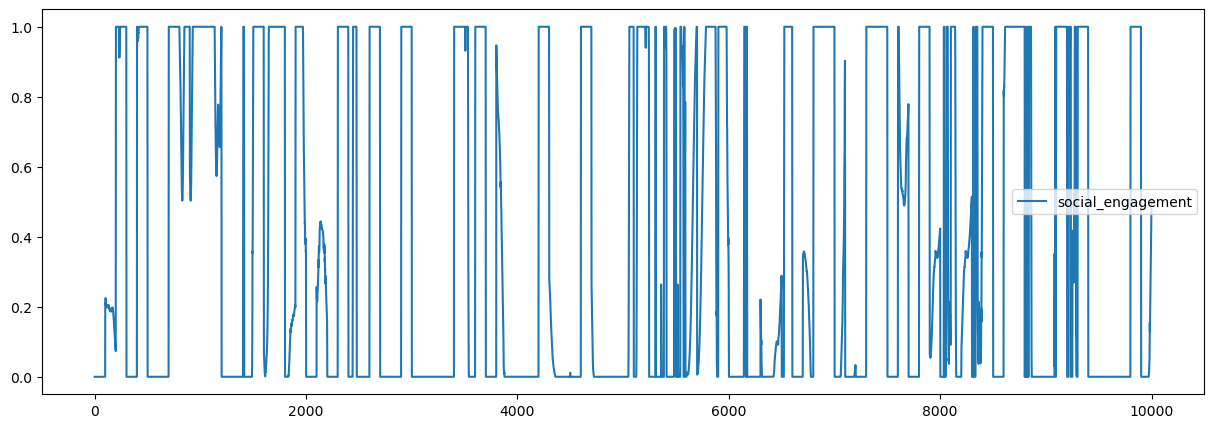

In [24]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.lineplot(data=int_df, y="social_engagement",x="Frame",hue="ID",ci=None, palette="flare")

# plt.plot(data=int_df, ax=ax, kind='line', x='Frame', y='social_engagement')

int_df.iloc[0:10000][["social_engagement"]].plot(kind="line", figsize=(15,5))


# Clustering

In [26]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Visualise Data Distribution

(array([27399.,   731.,   643.,   682.,   525.,   523.,   616.,   402.,
          323., 15356.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

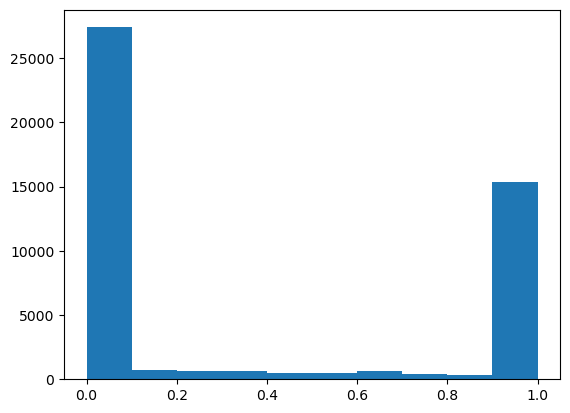

In [27]:
plt.hist(int_df['social_engagement'])

### ___________________________________________________________________

## ________________________________________

In [82]:
int_df['index1'] = int_df.index
new = int_df[['Frame', 'social_engagement']]
new.set_index('Frame', inplace=True)
new = new.T
new

Frame              -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  ...   40  \
social_engagement  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   

Frame               41   42   43   44   45   46   47   48   49  
social_engagement  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 47200 columns]

In [83]:
int_df = int_df.fillna(0)
# int_df = int_df.replace(to_replace=" NULL",value=0)
int_df.isnull().any()
int_df.isnull().sum().sum()

int_df

ID  Frame  social_engagement           soc_eng_with   GROUP  OGINDEX  \
0       5    -50                0.0  social_engagement_5_1  study1     6005   
1       5    -49                0.0  social_engagement_5_1  study1     6006   
2       5    -48                0.0  social_engagement_5_1  study1     6007   
3       5    -47                0.0  social_engagement_5_1  study1     6008   
4       5    -46                0.0  social_engagement_5_1  study1     6009   
...    ..    ...                ...                    ...     ...      ...   
47195   2     45                0.0  social_engagement_3_2  study6    52324   
47196   2     46                0.0  social_engagement_3_2  study6    52325   
47197   2     47                0.0  social_engagement_3_2  study6    52326   
47198   2     48                0.0  social_engagement_3_2  study6    52327   
47199   2     49                0.0  social_engagement_3_2  study6    52328   

       index1  
0           0  
1           1  
2           2  
3           3  
4           4  
...       ...  
47195   47195  
47196   47196  
47197   47197  
47198   47198  
47199   47199  

[47200 rows x 7 columns]

In [84]:
columns_per_row = 100
num_columns = len(new.columns) 

# Calculate the number of resulting rows
num_result_rows = num_columns // columns_per_row + (1 if num_columns % columns_per_row != 0 else 0)
# Initialize an empty DataFrame to store the result
result_list = []

# Loop through the range of rows
for i in range(num_result_rows):
    # Calculate the start and end indices for the current subset of columns
    start_index = i * columns_per_row
    end_index = min((i + 1) * columns_per_row, num_columns)

    ID = int_df['ID'].loc[start_index]
    INDEX = int_df['index1'].loc[start_index]
    GROUP = int_df['GROUP'].loc[start_index]

    subset_df = new.iloc[:, start_index:end_index].copy()
    subset_df['ID'] = ID
    subset_df['OGINDEX'] = INDEX 
    subset_df['GROUP'] = GROUP
    # print(subset_df)
    result_list.append(subset_df)    

result_df = pd.DataFrame()
print (subset_df.columns[subset_df.columns.duplicated(keep=False)])
result_df = pd.concat(result_list)
result_df.reset_index(drop=True, inplace=True)
result_df['ID'] = result_df['ID'].astype(int)

result_df


Index([], dtype='object', name='Frame')


Frame       -50       -49       -48       -47       -46       -45       -44  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.211379  0.205350  0.205758  0.224928  0.222171  0.217401  0.213032   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      1.000000  1.000000  0.992533  0.992071  0.996926  0.989993  0.972910   
..          ...       ...       ...       ...       ...       ...       ...   
467    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
468    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
469    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
470    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
471    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...       43        44        45  \
0      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
1      0.203705  0.206590  0.206474  ...  0.10198  0.097736  0.093524   
2      1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
4      0.970368  0.959164  0.962239  ...  1.00000  1.000000  1.000000   
..          ...       ...       ...  ...      ...       ...       ...   
467    1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
468    1.000000  1.000000  1.000000  ...  0.00000  0.000000  0.000000   
469    0.387299  0.391139  0.407174  ...  0.00000  0.000000  0.000000   
470    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
471    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   

Frame        46        47        48        49  ID  OGINDEX   GROUP  
0      0.000000  0.000000  0.000000  0.000000   5        0  study1  
1      0.088611  0.083741  0.078427  0.073444   2      100  study1  
2      1.000000  1.000000  1.000000  1.000000   4      200  study1  
3      0.000000  0.000000  0.000000  0.000000   2      300  study1  
4      1.000000  1.000000  1.000000  1.000000   4      400  study1  
..          ...       ...       ...       ...  ..      ...     ...  
467    1.000000  1.000000  1.000000  1.000000   3    46700  study6  
468    0.000000  0.000000  0.000000  0.000000   2    46800  study6  
469    0.000000  0.000000  0.000000  0.000000   5    46900  study6  
470    0.000000  0.000000  0.000000  0.000000   5    47000  study6  
471    0.000000  0.000000  0.000000  0.000000   2    47100  study6  

[472 rows x 103 columns]

## ______________________________________________________________

In [136]:
select_df = result_df.drop(['ID', 'OGINDEX', 'GROUP'], axis=1)
select_df = select_df.fillna(0)
select_df = select_df.replace(to_replace=" NULL",value=0)
select_df

s = select_df.std(axis=1)
m = select_df.mean(axis=1)

select_df['std'] = s
select_df['mean'] = m
select_df['ID'] = result_df['ID'].values
select_df['OGINDEX'] = result_df['OGINDEX'].values

std_df = select_df
std_df = std_df.loc[std_df['std'] != 0.000000]
std_df = std_df.loc[std_df['std'] > 0.090499]
std_df['GROUP'] = result_df['GROUP']

std_df = std_df.reset_index()
stdd_df = std_df
# stdd_df['GROUP'] = select_df['GROUP'].values
std_df

Frame  index       -50       -49       -48       -47       -46       -45  \
0          8  1.000000  1.000000  0.987772  0.969110  0.948663  0.928404   
1          9  0.607032  0.583048  0.563948  0.546880  0.529279  0.518946   
2         11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3         14  0.000000  0.000000  0.000000  0.000000  0.296315  0.525046   
4         16  0.086001  0.069951  0.061663  0.051460  0.043821  0.035085   
..       ...       ...       ...       ...       ...       ...       ...   
144      462  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145      463  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146      468  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147      469  0.481144  0.459985  0.436112  0.407776  0.402511  0.385061   
148      471  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -44       -43       -42  ...        45        46        47  \
0      0.911765  0.894542  0.881232  ...  1.000000  1.000000  1.000000   
1      0.509715  0.504803  0.503123  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  0.940798  0.977336  1.000000   
3      1.000000  1.000000  1.000000  ...  0.405785  0.556372  0.658911   
4      0.028209  0.020379  0.015057  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.067933  0.029124  0.008758   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.393112  0.387299  0.391139  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame        48        49       std      mean  ID  OGINDEX   GROUP  
0      1.000000  1.000000  0.175454  0.870875   1      800  study1  
1      1.000000  1.000000  0.174386  0.904106   1      900  study1  
2      1.000000  1.000000  0.158623  0.828711   4     1100  study1  
3      0.708306  0.824043  0.299278  0.130349   3     1400  study1  
4      1.000000  1.000000  0.454354  0.594838   1     1600  study1  
..          ...       ...       ...       ...  ..      ...     ...  
144    0.000053  0.000000  0.280763  0.829241   1    46200  study6  
145    0.000000  0.000000  0.289450  0.192750   4    46300  study6  
146    0.000000  0.000000  0.493858  0.507880   2    46800  study6  
147    0.000000  0.000000  0.231023  0.203109   5    46900  study6  
148    0.000000  0.000000  0.368453  0.160000   2    47100  study6  

[149 rows x 106 columns]

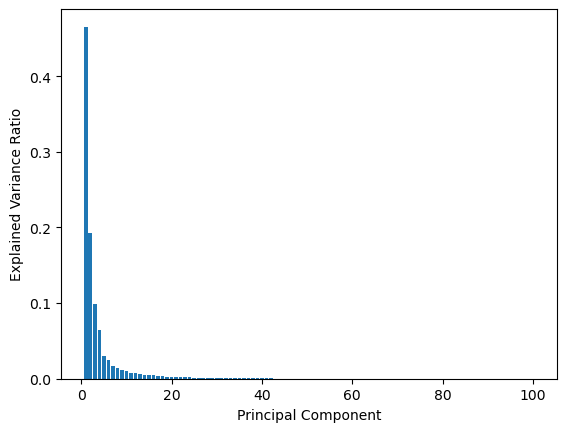

Original DataFrame:
Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42      

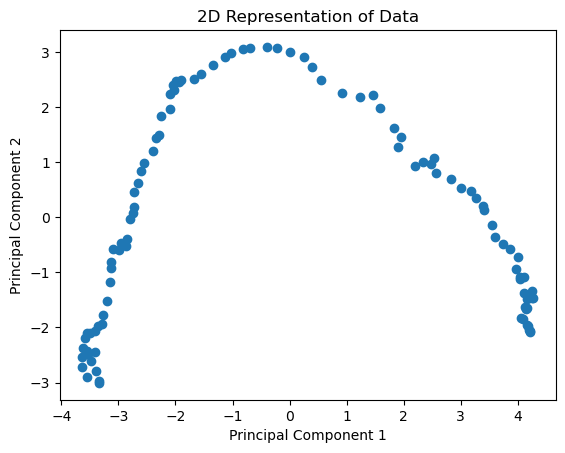

In [137]:
std_df = std_df.rename(str,axis="columns")
std_df = std_df.drop('std', axis=1)
std_df = std_df.drop('mean', axis=1)
std_df = std_df.drop('index', axis=1)
std_df = std_df.drop('ID', axis=1)
std_df = std_df.drop('OGINDEX', axis=1)
std_df = std_df.drop('GROUP', axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(std_df.T)

# Perform PCA
pca = PCA()
#pca_result = pca.fit_transform(scaled_data)

pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 5
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(std_df.T)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)



# Display the results
print("Original DataFrame:")
print(std_df)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()

In [138]:
pca_result
pca_result = (pca_result-pca_result.min())/(pca_result.max()-pca_result.min())
# df_norm

In [139]:
pca_result_df = pd.DataFrame(pca_result)
pca_result_df.index -= 50
pca_result_df

0         1         2         3         4
-50  0.973831  0.229097  0.263579  0.333358  0.362249
-49  0.977724  0.226429  0.259463  0.332543  0.364156
-48  0.983738  0.249278  0.269741  0.313682  0.354927
-47  0.982736  0.252689  0.269052  0.314351  0.355435
-46  0.986864  0.250713  0.266317  0.307981  0.350795
..        ...       ...       ...       ...       ...
 45  0.000000  0.115720  0.703465  0.320601  0.442406
 46  0.011046  0.092328  0.736673  0.308012  0.424582
 47  0.037312  0.083096  0.748369  0.272135  0.432900
 48  0.037102  0.079159  0.761580  0.262056  0.430990
 49  0.030957  0.107595  0.744490  0.266553  0.437758

[100 rows x 5 columns]

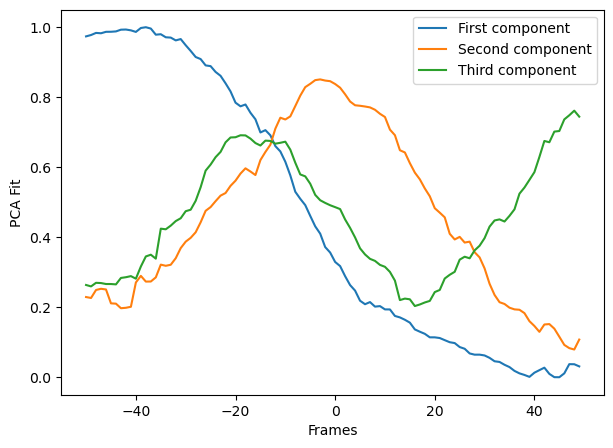

In [140]:
fig, ax = plt.subplots(figsize=(7, 5))

line1, = ax.plot(pca_result_df[0])
line2, = ax.plot(pca_result_df[1])
line3, = ax.plot(pca_result_df[2])

plt.xlabel('Frames')
plt.ylabel('PCA Fit')

ax.legend([line1, line2, line3], ['First component', 'Second component', 'Third component'])

0          1          2          3          4
0    35.363904  39.368948  38.608051  38.920125  40.005319
1    36.592317  43.318758  42.708586  42.241285  41.524595
2    42.484833  36.274985  38.764337  38.365395  37.793626
3     8.844857   2.551316   5.689814   4.173315   5.570929
4    10.547822  28.682652  26.440186  26.567736  27.678686
..         ...        ...        ...        ...        ...
144  42.493937  41.223679  34.914301  38.942047  38.603477
145   6.118759  14.610487   8.243272   7.210216   9.169670
146  40.767079  25.043892  25.157195  22.980029  23.119395
147  17.219830   9.326224  10.347202   9.987654   8.882230
148   1.988559   6.878944   7.502525   6.844535   8.402401

[149 rows x 5 columns]

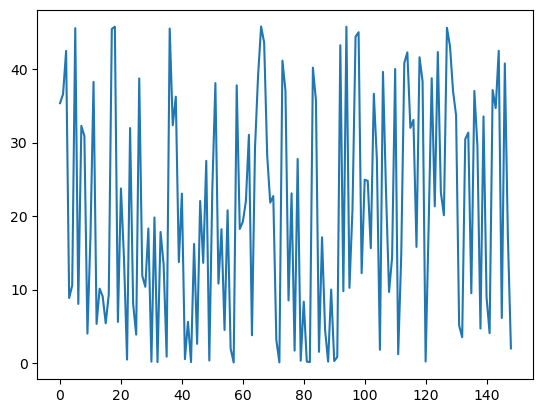

In [141]:
std_df.dot(pca_result)[0].plot()
projected_interactions = std_df.dot(pca_result) 
#the spikes: how they've responded to the PCA

projected_interactions_df = pd.DataFrame(projected_interactions)
projected_interactions_df

<AxesSubplot:>

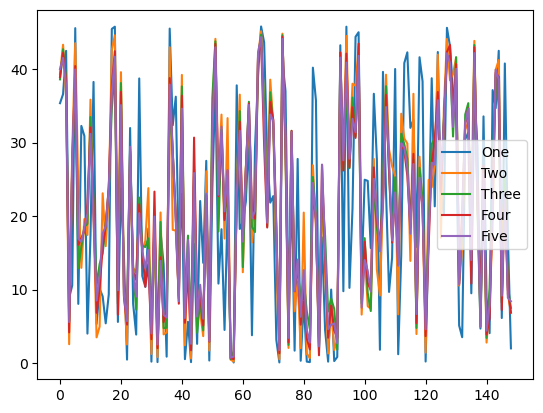

In [78]:
projected_interactions_df.plot()

Number of clusters from 3 to 7: 
 [3, 4, 5, 6]
For n_clusters = 3, silhouette score is 0.45817447614958223)
For n_clusters = 4, silhouette score is 0.4414740968344797)
For n_clusters = 5, silhouette score is 0.4649534240365869)
For n_clusters = 6, silhouette score is 0.42847498846319876)


AttributeError: 'PathCollection' object has no property 'legend'

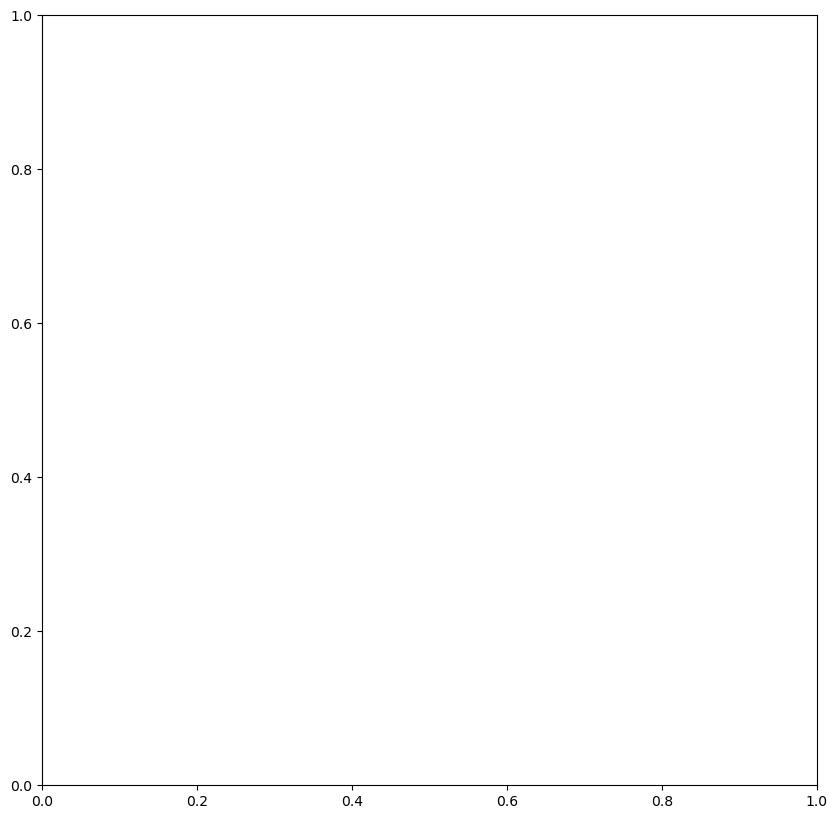

In [153]:
# Convert DataFrame to matrix
X = projected_interactions_df[[0, 1, 2, 3, 4]]

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
projected_interactions_df['Cluster'] = kmeans.labels_

##Optimum k
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(3,7))
print ("Number of clusters from 3 to 7: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
           
##############

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X[0], X[1], c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")


#label as ID
for i, txt in enumerate(range(len(projected_interactions_df))):
    plt.annotate(txt, (X.iloc[i,0], X.iloc[i,1]), xytext=(10,10), textcoords='offset points')
    
# plt.legend()
plt.show()

<AxesSubplot:xlabel='Frame'>

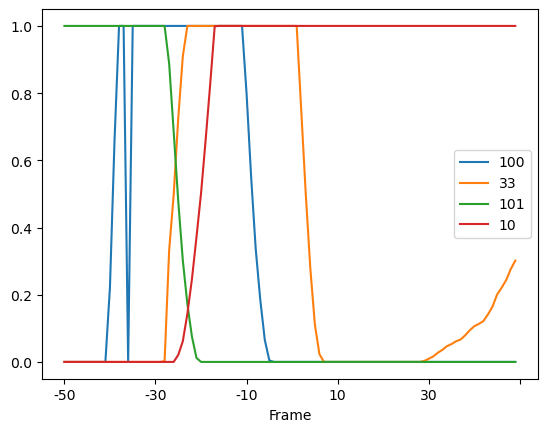

In [149]:
std_df.iloc[100].plot(legend=True)
std_df.iloc[33].plot(legend=True)
std_df.iloc[101].plot(legend=True)
std_df.iloc[10].plot(legend=True)

# std_df.iloc[100].plot()

<AxesSubplot:xlabel='Frame'>

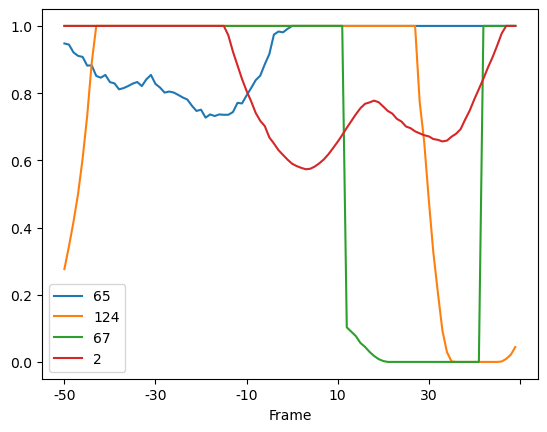

In [148]:
std_df.iloc[65].plot(legend=True)
std_df.iloc[124].plot(legend=True)
std_df.iloc[67].plot(legend=True)
std_df.iloc[2].plot(legend=True)


<AxesSubplot:xlabel='Frame'>

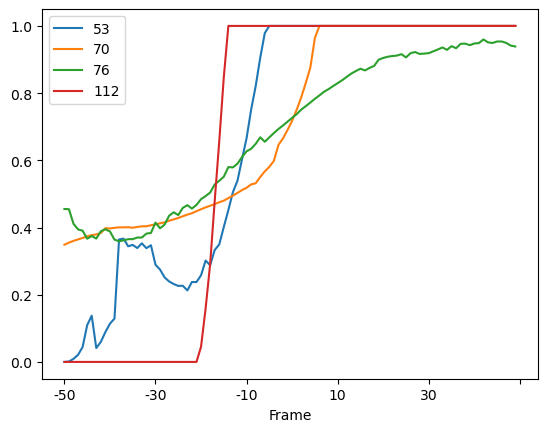

In [152]:
std_df.iloc[53].plot(legend=True)
std_df.iloc[70].plot(legend=True)
std_df.iloc[76].plot(legend=True)
std_df.iloc[112].plot(legend=True)


In [103]:
std_df.T.plot(legend=None,figsize=(10,5))

TypeError: no numeric data to plot

In [101]:
std_df['Cluster'] = projected_interactions_df['Cluster']
std_df['ID'] = stdd_df['ID']
std_df['OGINDEX'] = stdd_df['OGINDEX']
std_df['index'] = stdd_df['index']
std_df['std'] = stdd_df['std']
std_df['mean'] = stdd_df['mean']
std_df['GROUP'] = stdd_df['GROUP']
std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        47        48        49  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000  1.000000   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3      1.000000  1.000000  1.000000  ...  0.658911  0.708306  0.824043   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.008758  0.000053  0.000000   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame  Cluster  ID  OGINDEX  index       std      mean   GROUP  
0            2   1      800      8  0.175454  0.870875  study1  
1            2   1      900      9  0.174386  0.904106  study1  
2            2   4     1100     11  0.158623  0.828711  study1  
3            1   3     1400     14  0.299278  0.130349  study1  
4            0   1     1600     16  0.454354  0.594838  study1  
..         ...  ..      ...    ...       ...       ...     ...  
144          2   1    46200    462  0.280763  0.829241  study6  
145          1   4    46300    463  0.289450  0.192750  study6  
146          3   2    46800    468  0.493858  0.507880  study6  
147          1   5    46900    469  0.231023  0.203109  study6  
148          1   2    47100    471  0.368453  0.160000  study6  

[149 rows x 107 columns]

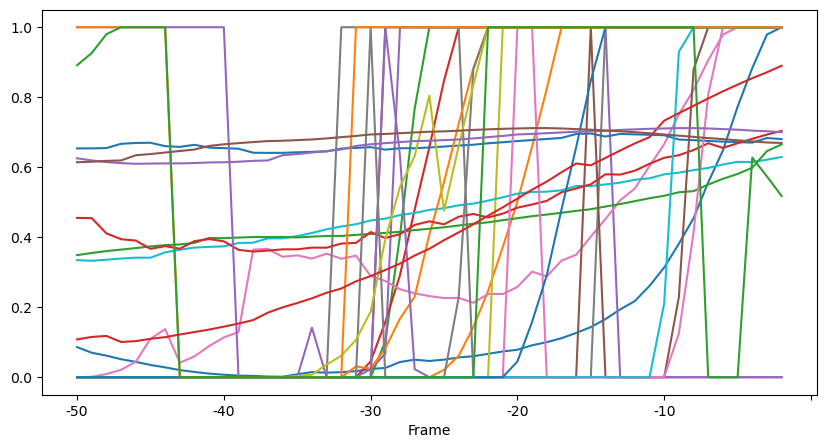

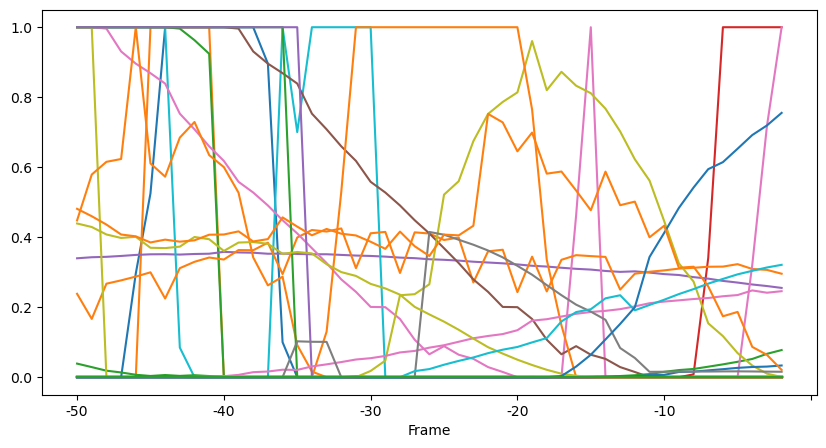

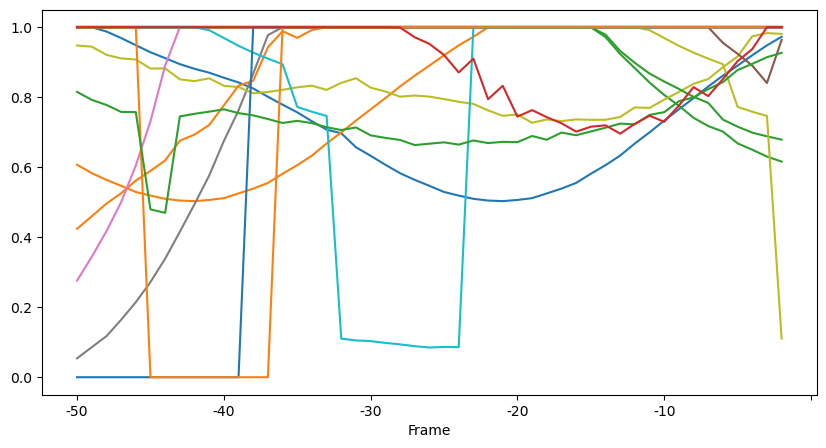

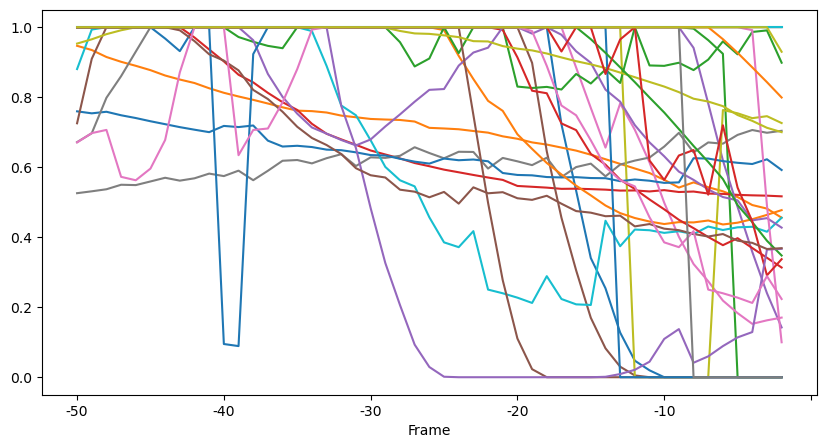

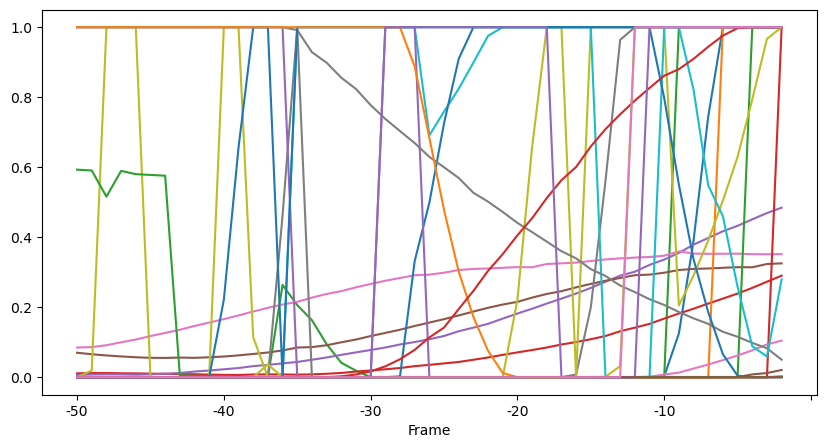

In [117]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    groups.iloc[:, : 49].T.plot(legend=None,figsize=(10,5))


In [102]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(groups[['OGINDEX','Cluster', 'ID', 'std', 'index']])  

Frame  OGINDEX  Cluster  ID       std  index
4         1600        0   1  0.454354     16
10        5100        0   4  0.447534     51
20        6500        0   1  0.414993     65
40       12700        0   1  0.414416    127
44       13600        0   1  0.496567    136
50       15400        0   3  0.472582    154
53       16400        0   1  0.376846    164
55       17000        0   4  0.500000    170
59       19900        0   3  0.456048    199
61       20700        0   5  0.114157    207
62       20800        0   5  0.134106    208
69       22000        0   4  0.419943    220
70       22500        0   1  0.273962    225
76       27300        0   2  0.222541    273
86       29900        0   2  0.483022    299
93       31500        0   5  0.491213    315
95       31700        0   3  0.488429    317
96       31800        0   5  0.436859    318
107      35300        0   4  0.402114    353
108      35500        0   4  0.491676    355
112      36200        0   2  0.463821    362
116      3

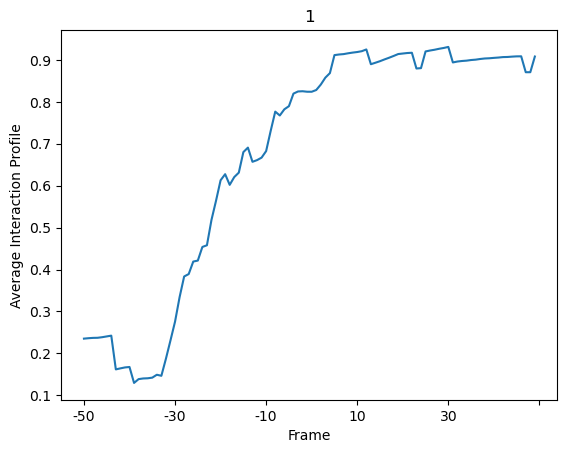

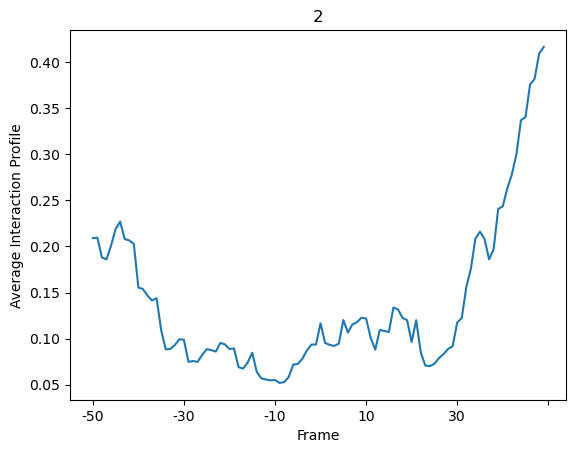

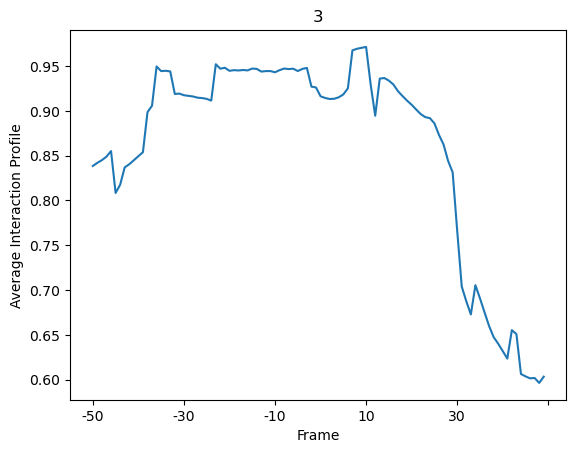

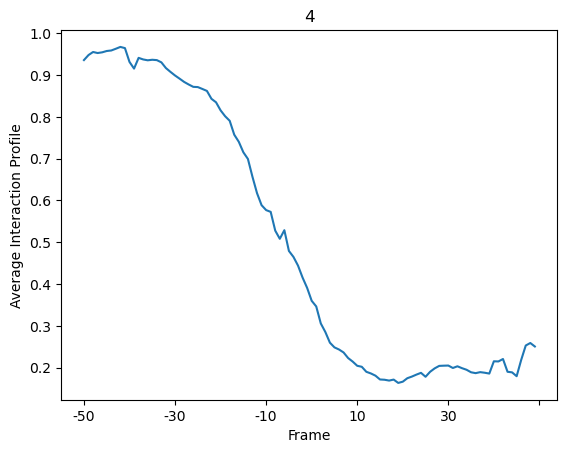

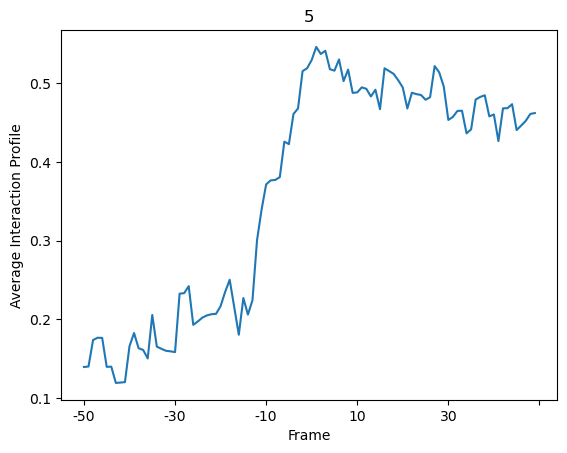

In [122]:
#plotting cluster 
grp = std_df.groupby(by=["Cluster"])

#avg profile of cluster
for name, data in grp:
    data = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index', 'mean'], axis=1)
    avg = data.mean(axis=0)
    fig, ax = plt.subplots()
    ax.set_title(int(name+1))
    ax.set_ylabel("Average Interaction Profile")
#     print(avg)
    ax= avg.plot(label=name)    

In [42]:
full_df = pd.merge(std_df, data_df, left_on='OGINDEX', right_on='Frame', how='inner')
full_df

-50  -49       -48      -47       -46       -45       -44       -43  \
0    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
1    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
2    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
3    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
4    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
..   ...  ...       ...      ...       ...       ...       ...       ...   
886  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
887  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
888  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
889  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
890  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

          -42       -41  ...         51z          52x          52y  \
0    0.881232  0.870084  ...  684.208666  1637.696553   983.019842   
1    0.881232  0.870084  ... -434.819638  -393.990300   830.669706   
2    0.881232  0.870084  ...  466.328544  1098.292547  -114.279163   
3    0.881232  0.870084  ... -345.782984  -623.034613   536.061024   
4    0.881232  0.870084  ...  341.889222    15.175401  1322.999213   
..        ...       ...  ...         ...          ...          ...   
886  0.000000  0.000000  ...  222.990194 -2598.136310 -3709.061437   
887  0.000000  0.000000  ...  651.720123  -173.559084 -1198.827178   
888  0.000000  0.000000  ... -248.348370   246.566266   613.279141   
889  0.000000  0.000000  ... -425.696188    13.796322   751.405505   
890  0.000000  0.000000  ... -581.346646   110.119081   -63.219668   

            52z          53x          53y          53z          54x  \
0    126.603855   658.782663  -338.734935   527.634481  -447.415894   
1   -137.829600 -1787.895232   715.409321  -237.655410 -1851.286029   
2   -116.446900  1636.488811  1672.835003   865.333157  1870.724253   
3   -145.202885   975.970175   287.659477  -142.986124   979.900583   
4    850.118262 -1545.080000   402.491451   324.493427 -1060.921896   
..          ...          ...          ...          ...          ...   
886  418.634897  -300.998374   577.564589  -135.330524 -1904.964903   
887  384.009997   -17.388714 -1463.219927  -503.481487   136.126533   
888 -391.414473   806.899142   -64.425540  -152.643993  -560.341073   
889  101.676913  1574.433629   642.772129 -1072.029604  1161.898363   
890  748.416613   130.825279   684.778391  1423.972799   -21.579940   

             54y         54z  
0     429.886634 -277.487641  
1    1786.019268 -265.672230  
2     834.857416  262.710974  
3     281.599695 -123.509690  
4    1357.910852  939.227221  
..           ...         ...  
886 -4002.379816  582.634018  
887   718.734236 -194.632571  
888   940.609019 -353.555759  
889  -142.197467 -971.773209  
890   702.035490 -696.981813  

[891 rows x 200 columns]

In [43]:
interaction_counts = std_df.groupby(['ID'])['GROUP'].value_counts()
interaction_counts_df = interaction_counts.reset_index(name='occurrences')
interaction_counts_df['Cluster'] = std_df['Cluster']
# interaction_counts_df = interaction_counts_df.sort_values(by='GROUP')
interaction_counts_df

ID   GROUP  occurrences  Cluster
0    1  study3           11        2
1    1  study4           10        2
2    1  study2            6        2
3    1  study6            5        1
4    1  study1            4        0
5    2  study2            7        2
6    2  study3            6        3
7    2  study6            5        4
8    2  study4            3        4
9    2  study1            2        3
10   2  study5            2        0
11   3  study2            7        4
12   3  study4            6        1
13   3  study3            5        1
14   3  study5            4        3
15   3  study6            3        3
16   3  study1            1        3
17   4  study6            9        2
18   4  study2            7        2
19   4  study3            7        1
20   4  study1            5        0
21   4  study4            5        1
22   4  study5            4        1
23   5  study3            9        4
24   5  study5            5        3
25   5  study2            4        1
26   5  study6            4        4
27   5  study1            2        3
28   5  study4            1        3

In [46]:
# grp = full_df.groupby(by=["Cluster"])

# length = 10

# for name, data in grp:
#     for i, row in data.iterrows():
#         if i == ID:
#             continue
#         else:
#             ID = int(row["ID"])
#             x = row['{}TX'.format(ID)]
#             y = row['{}TY'.format(ID)]
#             yaw = row['{}TZ'.format(ID)]
    
#         plt.scatter(x, y, s=100, label=ID)
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw),
#             length * np.sin(yaw),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw - fov_angle),
#             length * np.sin(yaw - fov_angle),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw + fov_angle),
#             length * np.sin(yaw + fov_angle),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
        
#     plt.xlim(-4000, 4000)
#     plt.ylim(-4000, 4000)
#     plt.legend(loc="upper left")
#     plt.show()


In [45]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in std_df.iterrows():
    frame = row['OGINDEX']
    frame = (int(frame)/VICON_FPS)*VIDEO_FPS
    std_df.at[index,'Framez'] = int(frame)

std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        48        49  Cluster  ID  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000        2   1   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000        2   1   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000        2   4   
3      1.000000  1.000000  1.000000  ...  0.708306  0.824043        1   3   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000        0   1   
..          ...       ...       ...  ...       ...       ...      ...  ..   
144    1.000000  1.000000  1.000000  ...  0.000053  0.000000        2   1   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000        1   4   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000        4   2   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000        1   5   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000        1   2   

Frame  OGINDEX  index       std      mean   GROUP  Framez  
0          800      8  0.175454  0.870875  study1   160.0  
1          900      9  0.174386  0.904106  study1   180.0  
2         1100     11  0.158623  0.828711  study1   220.0  
3         1400     14  0.299278  0.130349  study1   280.0  
4         1600     16  0.454354  0.594838  study1   320.0  
..         ...    ...       ...       ...     ...     ...  
144      46200    462  0.280763  0.829241  study6  9240.0  
145      46300    463  0.289450  0.192750  study6  9260.0  
146      46800    468  0.493858  0.507880  study6  9360.0  
147      46900    469  0.231023  0.203109  study6  9380.0  
148      47100    471  0.368453  0.160000  study6  9420.0  

[149 rows x 108 columns]

In [47]:
projected_interactions_df
# projected_interactions_df = projected_interactions_df.rename_axis('Frame', axis=1)
projected_interactions_df.rename(columns={0:'One'}, inplace=True)
projected_interactions_df.rename(columns={1:'Two'}, inplace=True)
projected_interactions_df.rename(columns={2:'Three'}, inplace=True)
projected_interactions_df.rename(columns={3:'Four'}, inplace=True)
projected_interactions_df.rename(columns={4:'Five'}, inplace=True)
projected_interactions_df

One        Two      Three       Four       Five  Cluster
0    35.363904  39.368948  38.608051  38.920125  40.005319        2
1    36.592317  43.318758  42.708586  42.241285  41.524595        2
2    42.484833  36.274985  38.764337  38.365395  37.793626        2
3     8.844857   2.551316   5.689814   4.173315   5.570929        1
4    10.547822  28.682652  26.440186  26.567736  27.678686        0
..         ...        ...        ...        ...        ...      ...
144  42.493937  41.223679  34.914301  38.942047  38.603477        2
145   6.118759  14.610487   8.243272   7.210216   9.169670        1
146  40.767079  25.043892  25.157195  22.980029  23.119395        4
147  17.219830   9.326224  10.347202   9.987654   8.882230        1
148   1.988559   6.878944   7.502525   6.844535   8.402401        1

[149 rows x 6 columns]

In [48]:
projected_interactions_df
projected_interactions_df = projected_interactions_df.drop('Cluster', axis=1)
std_df
clus_df = pd.concat([std_df, projected_interactions_df], axis=1)
print(clus_df.columns.tolist())

['-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 'Cluster', 'ID', 'OGINDEX', 'index', 'std', 'mean', 'GROUP', 'Framez', 'One', 'Two', 'Three', 'Four', 'Five']


Cluster
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
Name: One, dtype: object

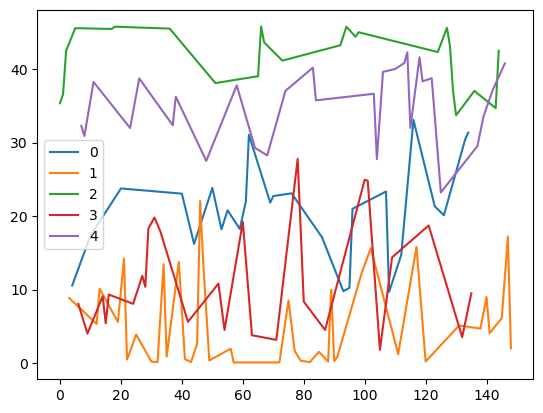

In [49]:
clus_df.groupby('Cluster')['One'].plot(legend=True)
# clus_df.groupby('Cluster')['Two'].plot(legend=True)
# clus_df.groupby('Cluster')['Three'].plot(legend=True)
# clus_df.groupby('Cluster')['Four'].plot(legend=True)
# clus_df.groupby('Cluster')['Five'].plot(legend=True)

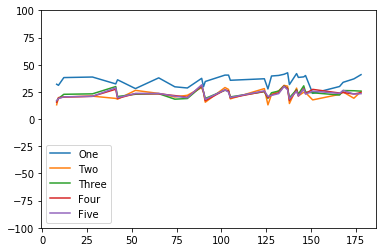

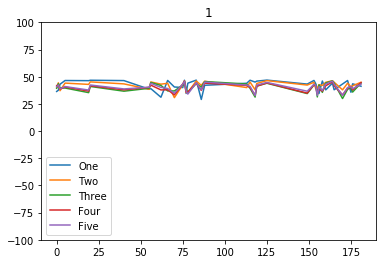

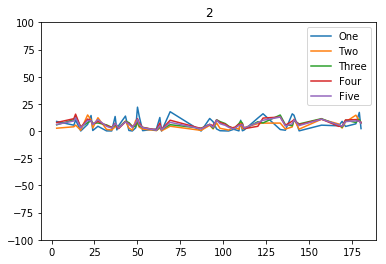

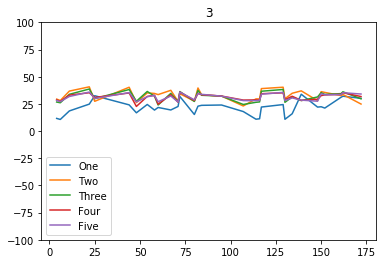

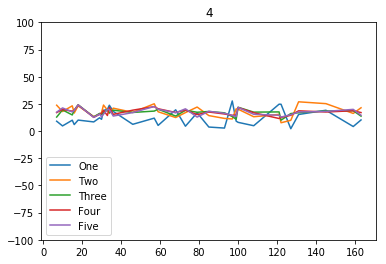

In [51]:
grp = clus_df.groupby(by=["Cluster"])

for name, data in grp:
    ax= data[['One', 'Two', 'Three', 'Four', 'Five']].plot(title=name, ylim=(-100,100))  
#     plt.xlabel('Framez')
    

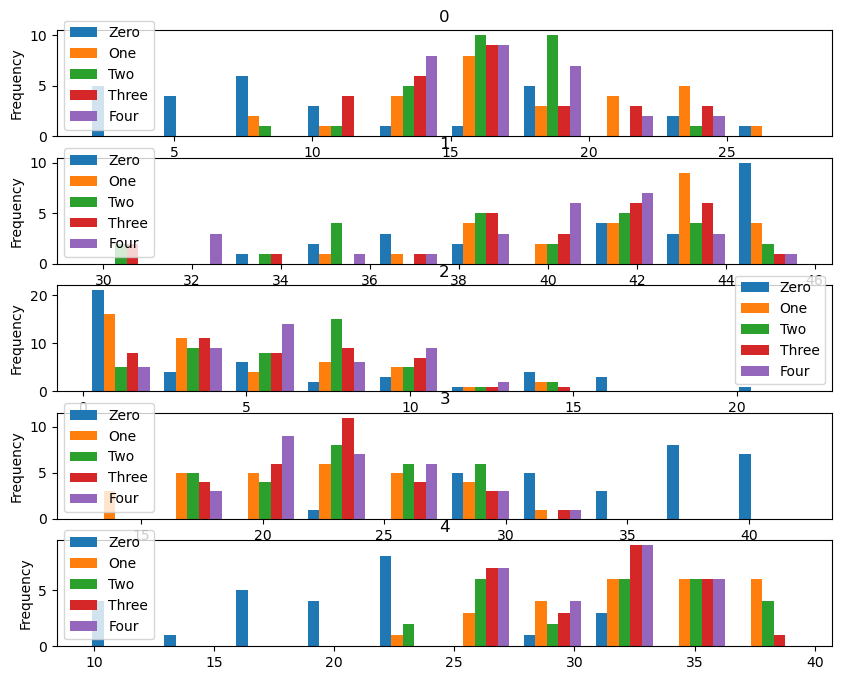

In [671]:
ax = clus_df.plot.hist(column=["Zero", "One", "Two", "Three", "Four"], by="Cluster", figsize=(10, 8))

In [51]:
#is participant always in same cluster?

# Group by "GROUP" column
grouped_by_group = std_df.groupby(by=["GROUP"])

# Iterate over groups
for group_name, group_data in grouped_by_group:
    print(f"Group {group_name}:")
    
    # Group data within each group by "Cluster" column
    grouped_by_cluster = group_data.groupby(by=["Cluster"])
    
    # Count occurrences of each ID within the cluster
    id_counts = grouped_by_cluster['ID'].value_counts()

    print(id_counts)

    

Group study1:
Cluster  ID
0        1     1
         2     1
1        3     1
         4     1
         5     1
2        1     3
         2     1
         4     1
3        4     1
4        4     2
         5     1
Name: ID, dtype: int64
Group study2:
Cluster  ID
0        1     1
         2     1
         4     1
1        1     4
         3     3
         4     3
         2     2
         5     2
2        4     2
         2     1
3        2     3
         3     2
         4     1
         5     1
4        3     2
         1     1
         5     1
Name: ID, dtype: int64
Group study3:
Cluster  ID
0        4     2
         5     2
         1     1
         2     1
         3     1
1        5     3
         1     2
         3     2
         2     1
         4     1
2        1     2
         4     1
         5     1
3        1     3
         4     3
         5     3
         2     1
4        1     3
         2     3
         3     2
Name: ID, dtype: int64
Group study4:
Cluster  ID
0        1 

In [52]:
counts = std_df.groupby(['Cluster', 'GROUP'])['ID'].value_counts()
counts_df = counts.reset_index(name='occurrences')
counts_df

Cluster   GROUP  ID  occurrences
0         0  study1   1            1
1         0  study1   2            1
2         0  study2   1            1
3         0  study2   2            1
4         0  study2   4            1
..      ...     ...  ..          ...
87        4  study4   5            1
88        4  study5   5            1
89        4  study6   4            3
90        4  study6   2            2
91        4  study6   5            1

[92 rows x 4 columns]

In [53]:
#How many people in same ish cluster?
grp = std_df.groupby(by=["GROUP"])

for name, data in grp:
    print(data['ID'].value_counts())
    
    

4    5
1    4
5    2
2    2
3    1
Name: ID, dtype: int64
4    7
3    7
2    7
1    6
5    4
Name: ID, dtype: int64
1    11
5     9
4     7
2     6
3     5
Name: ID, dtype: int64
1    10
3     6
4     5
2     3
5     1
Name: ID, dtype: int64
5    5
4    4
3    4
2    2
Name: ID, dtype: int64
4    9
1    5
2    5
5    4
3    3
Name: ID, dtype: int64


# Correlations between social engagement profiles and personality

In [54]:
file = Path("big5.csv")
big5_df = pd.read_csv(file)

C:\Users\n23-webb\AppData\Local\Temp\ipykernel_3964\52850351.py:93: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

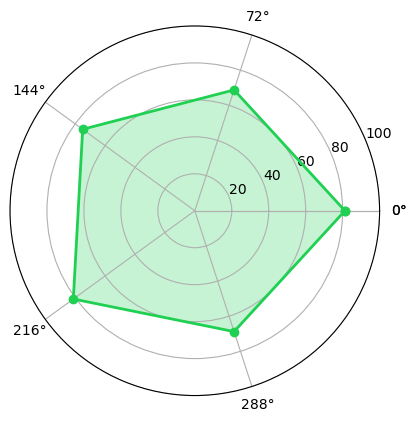

In [55]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age
dfbig5["culture"] = country
dfbig5["gender"] = sex

emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [56]:
# grp = dfbig5.groupby(by=["group"])

# for group, data in grp:
    # interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")
soceng_std

GROUP  ID  social_engagement_std
0   study1   1               0.468462
1   study1   2               0.475098
2   study1   3               0.445571
3   study1   4               0.480617
4   study1   5               0.322680
5   study2   1               0.502077
6   study2   2               0.468974
7   study2   3               0.452332
8   study2   4               0.404874
9   study2   5               0.477381
10  study3   1               0.454123
11  study3   2               0.458379
12  study3   3               0.491459
13  study3   4               0.504936
14  study3   5               0.446244
15  study4   1               0.439460
16  study4   2               0.495188
17  study4   3               0.454563
18  study4   4               0.490162
19  study4   5               0.425897
20  study5   1               0.425559
21  study5   2               0.487143
22  study5   3               0.452912
23  study5   4               0.514915
24  study5   5               0.455076
25  study6   1               0.429936
26  study6   2               0.493472
27  study6   3               0.484168
28  study6   4               0.473761
29  study6   5               0.375947

In [57]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles

ID  Frame   GROUP  social_engagement_mean  social_engagement_std
0      1    -50  study1                0.347481               0.460369
1      1    -50  study2                0.440768               0.500212
2      1    -50  study3                0.350000               0.489360
3      1    -50  study4                0.280500               0.441673
4      1    -50  study5                0.214286               0.425815
...   ..    ...     ...                     ...                    ...
2995   5     49  study2                0.448380               0.499697
2996   5     49  study3                0.357043               0.444666
2997   5     49  study4                0.189266               0.402298
2998   5     49  study5                0.519899               0.456314
2999   5     49  study6                0.243564               0.406861

[3000 rows x 5 columns]

In [58]:
dfbig5
dfbig5= dfbig5.drop(20)
dfbig5 = dfbig5.reset_index(drop=True)
dfbig5 = dfbig5.sort_values(['group','helmet'], ascending=[True, True])
dfbig5

emotional_stability  extraversion  agreeableness  conscientiousness  \
4                 68.75         81.25          75.00              68.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
0                 75.00         68.75          75.00              43.75   
3                 75.00         81.25          81.25              81.25   
9                 87.50         68.75          68.75              75.00   
5                 68.75         68.75          75.00              68.75   
7                106.25         68.75          75.00             100.00   
6                 81.25         68.75          68.75             112.50   
8                 68.75         68.75          81.25             100.00   
12               100.00         62.50          56.25              87.50   
13                68.75         81.25          75.00              75.00   
14                75.00         68.75          81.25              68.75   
11                62.50         75.00          68.75              75.00   
10                62.50         68.75          75.00              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
22                75.00         87.50          75.00              75.00   
20                87.50         81.25          81.25              68.75   
23                93.75         81.25          81.25              62.50   
21                87.50         62.50          81.25              93.75   
25                75.00         62.50          62.50              50.00   
28                81.25         68.75          75.00              81.25   
27                75.00         93.75          93.75              56.25   
24                43.75         68.75          81.25              87.50   
26                68.75         68.75          56.25              62.50   

    intellect  helmet  group  age culture  gender  
4       75.00       1      1   34      NG    male  
1       75.00       2      1   29      GB   other  
2       81.25       3      1   28      GR    male  
0       68.75       4      1   30      GB    male  
3       75.00       5      1   28      GB    male  
9       62.50       1      2   29      GB    male  
5       75.00       2      2   28      GB    male  
7       68.75       3      2   30      GB    male  
6       75.00       4      2   32      GB  female  
8       75.00       5      2   34      GB    male  
12      75.00       1      3   26      PT    male  
13      62.50       2      3   34      IT  female  
14      75.00       3      3   27      GB  female  
11      87.50       4      3   24      GB    male  
10      68.75       5      3   40      GB    male  
15      81.25       1      4   53      GB  female  
16      81.25       2      4   34      CO  female  
17      68.75       3      4   59      GB    male  
18      68.75       4      4   38      HK  female  
19      56.25       5      4   34      LK    male  
22      75.00       2      5   53      GB    male  
20      68.75       3      5   26      TH    male  
23      68.75       4      5   29      GB  female  
21      68.75       5      5   46      GB    male  
25      75.00       1      6   28      GB    male  
28      68.75       2      6   34      GB    male  
27      62.50       3      6   30      GB    male  
24      62.50       4      6   26      GB    male  
26      81.25       5      6   28      GB  female

In [59]:
big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr = df_corr.loc[:,~df_corr.columns.duplicated()].copy()
df_corr.index = np.arange(1, len(df_corr) + 1)

dfbig5 = dfbig5.rename(columns={"helmet": "ID", "group": "GROUP"})

df_corr['ID'] = df_corr['ID'].astype(int)

for idx, name in df_corr.iterrows():
    new = name['GROUP'][-1]
    df_corr.loc[idx, 'GROUP'] = new

df_corr['ID'] = df_corr['ID'].astype(int)
df_corr['GROUP'] = df_corr['GROUP'].astype(int)

dfbig5['ID'] = dfbig5['ID'].astype(int)
dfbig5['GROUP'] = dfbig5['GROUP'].astype(int)

full_corr = pd.merge(dfbig5, df_corr, on=['GROUP', 'ID'])
full_corr


emotional_stability  extraversion  agreeableness  conscientiousness  \
0                 68.75         81.25          75.00              68.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
3                 75.00         68.75          75.00              43.75   
4                 75.00         81.25          81.25              81.25   
5                 87.50         68.75          68.75              75.00   
6                 68.75         68.75          75.00              68.75   
7                106.25         68.75          75.00             100.00   
8                 81.25         68.75          68.75             112.50   
9                 68.75         68.75          81.25             100.00   
10               100.00         62.50          56.25              87.50   
11                68.75         81.25          75.00              75.00   
12                75.00         68.75          81.25              68.75   
13                62.50         75.00          68.75              75.00   
14                62.50         68.75          75.00              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
20                75.00         87.50          75.00              75.00   
21                87.50         81.25          81.25              68.75   
22                93.75         81.25          81.25              62.50   
23                87.50         62.50          81.25              93.75   
24                75.00         62.50          62.50              50.00   
25                81.25         68.75          75.00              81.25   
26                75.00         93.75          93.75              56.25   
27                43.75         68.75          81.25              87.50   
28                68.75         68.75          56.25              62.50   

    intellect  ID  GROUP  age culture  gender  social_engagement_mean  \
0       75.00   1      1   34      NG    male                0.383585   
1       75.00   2      1   29      GB   other                0.462961   
2       81.25   3      1   28      GR    male                0.256076   
3       68.75   4      1   30      GB    male                0.458214   
4       75.00   5      1   28      GB    male                0.117778   
5       62.50   1      2   29      GB    male                0.475408   
6       75.00   2      2   28      GB    male                0.369500   
7       68.75   3      2   30      GB    male                0.331478   
8       75.00   4      2   32      GB  female                0.235048   
9       75.00   5      2   34      GB    male                0.381752   
10      75.00   1      3   26      PT    male                0.316798   
11      62.50   2      3   34      IT  female                0.313426   
12      75.00   3      3   27      GB  female                0.394838   
13      87.50   4      3   24      GB    male                0.471321   
14      68.75   5      3   40      GB    male                0.360817   
15      81.25   1      4   53      GB  female                0.326815   
16      81.25   2      4   34      CO  female                0.433822   
17      68.75   3      4   59      GB    male                0.289952   
18      68.75   4      4   38      HK  female                0.441263   
19      56.25   5      4   34      LK    male                0.223454   
20      75.00   2      5   53      GB    male                0.322514   
21      68.75   3      5   26      TH    male                0.524677   
22      68.75   4      5   29      GB  female                0.461910   
2

In [60]:
interaction_counts_df['ID'] = interaction_counts_df['ID'].astype(int)
# interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'][-1]
for idx, name in interaction_counts_df.iterrows():
    new = name['GROUP'][-1]
    interaction_counts_df.loc[idx, 'GROUP'] = new
interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'].astype(int)

full_corr = pd.merge(full_corr, interaction_counts_df, on=['GROUP', 'ID'])
full_corr

emotional_stability  extraversion  agreeableness  conscientiousness  \
0                 68.75         81.25          75.00              68.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
3                 75.00         68.75          75.00              43.75   
4                 75.00         81.25          81.25              81.25   
5                 87.50         68.75          68.75              75.00   
6                 68.75         68.75          75.00              68.75   
7                106.25         68.75          75.00             100.00   
8                 81.25         68.75          68.75             112.50   
9                 68.75         68.75          81.25             100.00   
10               100.00         62.50          56.25              87.50   
11                68.75         81.25          75.00              75.00   
12                75.00         68.75          81.25              68.75   
13                62.50         75.00          68.75              75.00   
14                62.50         68.75          75.00              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
20                75.00         87.50          75.00              75.00   
21                87.50         81.25          81.25              68.75   
22                93.75         81.25          81.25              62.50   
23                87.50         62.50          81.25              93.75   
24                75.00         62.50          62.50              50.00   
25                81.25         68.75          75.00              81.25   
26                75.00         93.75          93.75              56.25   
27                43.75         68.75          81.25              87.50   
28                68.75         68.75          56.25              62.50   

    intellect  ID  GROUP  age culture  gender  social_engagement_mean  \
0       75.00   1      1   34      NG    male                0.383585   
1       75.00   2      1   29      GB   other                0.462961   
2       81.25   3      1   28      GR    male                0.256076   
3       68.75   4      1   30      GB    male                0.458214   
4       75.00   5      1   28      GB    male                0.117778   
5       62.50   1      2   29      GB    male                0.475408   
6       75.00   2      2   28      GB    male                0.369500   
7       68.75   3      2   30      GB    male                0.331478   
8       75.00   4      2   32      GB  female                0.235048   
9       75.00   5      2   34      GB    male                0.381752   
10      75.00   1      3   26      PT    male                0.316798   
11      62.50   2      3   34      IT  female                0.313426   
12      75.00   3      3   27      GB  female                0.394838   
13      87.50   4      3   24      GB    male                0.471321   
14      68.75   5      3   40      GB    male                0.360817   
15      81.25   1      4   53      GB  female                0.326815   
16      81.25   2      4   34      CO  female                0.433822   
17      68.75   3      4   59      GB    male                0.289952   
18      68.75   4      4   38      HK  female                0.441263   
19      56.25   5      4   34      LK    male                0.223454   
20      75.00   2      5   53      GB    male                0.322514   
21      68.75   3      5   26      TH    male                0.524677   
22      68.75   4      5   29      GB  female                0.461910   
2

In [141]:
interaction_counts_df

ID  GROUP  occurrences  Cluster
0    1      3           11        4
1    1      4           10        4
2    1      2            6        4
3    1      6            5        2
4    1      1            4        1
5    2      2            7        4
6    2      3            6        0
7    2      6            5        3
8    2      4            3        3
9    2      1            2        0
10   2      5            2        1
11   3      2            7        3
12   3      4            6        2
13   3      3            5        2
14   3      5            4        0
15   3      6            3        0
16   3      1            1        0
17   4      6            9        4
18   4      2            7        4
19   4      3            7        2
20   4      1            5        1
21   4      4            5        2
22   4      5            4        2
23   5      3            9        3
24   5      5            5        0
25   5      2            4        2
26   5      6            4        3
27   5      1            2        0
28   5      4            1        0

(array([[ 1.,  9., 12.,  5.,  2.],
        [ 0., 14., 13.,  2.,  0.],
        [ 2.,  4., 19.,  4.,  0.],
        [ 3., 11.,  7.,  5.,  3.],
        [ 1., 13., 14.,  1.,  0.]]),
 array([ 43.75,  57.5 ,  71.25,  85.  ,  98.75, 112.5 ]),
 <a list of 5 BarContainer objects>)

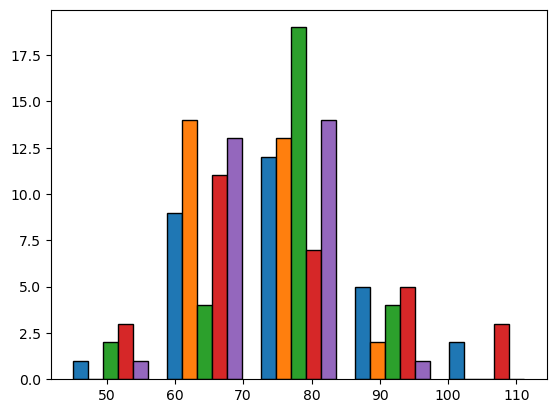

In [61]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

In [560]:
big5

['emotional_stability',
 'extraversion',
 'agreeableness',
 'conscientiousness',
 'intellect']

In [62]:
soceng_mean= soceng_mean.drop(20)
soceng_mean = soceng_mean.reset_index(drop=True)
soceng_mean

GROUP  ID  social_engagement_mean
0   study1   1                0.383585
1   study1   2                0.462961
2   study1   3                0.256076
3   study1   4                0.458214
4   study1   5                0.117778
5   study2   1                0.475408
6   study2   2                0.369500
7   study2   3                0.331478
8   study2   4                0.235048
9   study2   5                0.381752
10  study3   1                0.316798
11  study3   2                0.313426
12  study3   3                0.394838
13  study3   4                0.471321
14  study3   5                0.360817
15  study4   1                0.326815
16  study4   2                0.433822
17  study4   3                0.289952
18  study4   4                0.441263
19  study4   5                0.223454
20  study5   2                0.322514
21  study5   3                0.524677
22  study5   4                0.461910
23  study5   5                0.520555
24  study6   1                0.276910
25  study6   2                0.528741
26  study6   3                0.328007
27  study6   4                0.556273
28  study6   5                0.253825

In [70]:
interaction_counts_df

ID  GROUP  occurrences  Cluster
0    1      3           11        1
1    1      4           10        1
2    1      2            9        1
3    1      6            7        2
4    1      1            4        3
5    2      2            7        1
6    2      3            6        3
7    2      6            6        4
8    2      1            4        0
9    2      4            4        0
10   2      5            4        4
11   3      2            7        3
12   3      3            7        0
13   3      4            7        2
14   3      6            5        2
15   3      5            4        4
16   3      1            2        4
17   4      6           11        2
18   4      3            8        4
19   4      2            7        1
20   4      4            7        1
21   4      1            6        2
22   4      5            6        3
23   5      6           10        2
24   5      3            9        2
25   5      5            5        3
26   5      2            4        4
27   5      1            3        2
28   5      4            2        0

In [63]:
#CORR INTERACTION COUNT AND BIG 5
for cat in big5+ ["age"]:
    print("no. of interactions <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], interaction_counts_df["occurrences"])))
print("===================================================")

no. of interactions <-> emotional_stability: (r, p): PearsonRResult(statistic=-0.08226981567246289, pvalue=0.6713696178236735) 
no. of interactions <-> extraversion: (r, p): PearsonRResult(statistic=0.23650116437742896, pvalue=0.21675979772098738) 
no. of interactions <-> agreeableness: (r, p): PearsonRResult(statistic=0.3348905732755816, pvalue=0.07576704490632603) 
no. of interactions <-> conscientiousness: (r, p): PearsonRResult(statistic=-0.04879288815009643, pvalue=0.8015440818310613) 
no. of interactions <-> intellect: (r, p): PearsonRResult(statistic=-0.2495983560571044, pvalue=0.19162563263419352) 
no. of interactions <-> age: (r, p): PearsonRResult(statistic=0.23870832264168043, pvalue=0.21237486579988962) 


In [64]:
for cat in big5+ ["age"]:
    print("soceng_mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_mean"])))
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_std"])))
    print("soceng_after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_after"])))
    print("soceng_before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_before"])))
    print("soceng_delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_delta"])))
    print()
print("===================================================")

soceng_mean <-> emotional_stability: (r, p): PearsonRResult(statistic=0.015878320705512004, pvalue=0.9348446451235742) 
soceng_std <-> emotional_stability: (r, p): PearsonRResult(statistic=0.08168494695348569, pvalue=0.6735778992748483) 
soceng_after <-> emotional_stability: (r, p): PearsonRResult(statistic=-0.01204450935416193, pvalue=0.9505543297545761) 
soceng_before <-> emotional_stability: (r, p): PearsonRResult(statistic=-0.14666349413157176, pvalue=0.4477418712746889) 
soceng_delta <-> emotional_stability: (r, p): PearsonRResult(statistic=0.22476514404846717, pvalue=0.24110523998389927) 

soceng_mean <-> extraversion: (r, p): PearsonRResult(statistic=-0.16931142793639706, pvalue=0.379928938836562) 
soceng_std <-> extraversion: (r, p): PearsonRResult(statistic=0.07974735416000452, pvalue=0.6809125354262535) 
soceng_after <-> extraversion: (r, p): PearsonRResult(statistic=0.09050511876671286, pvalue=0.6405667905548091) 
soceng_before <-> extraversion: (r, p): PearsonRResult(statis

PearsonRResult(statistic=0.3348905732755816, pvalue=0.07576704490632603)

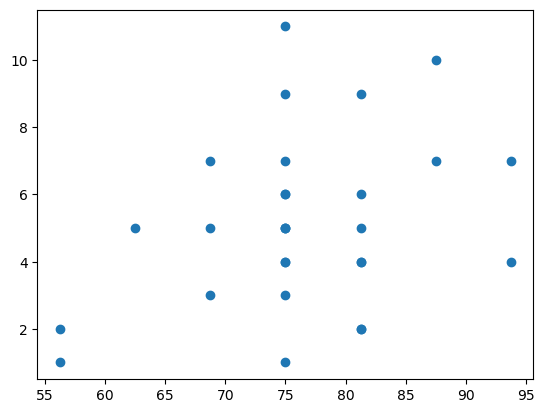

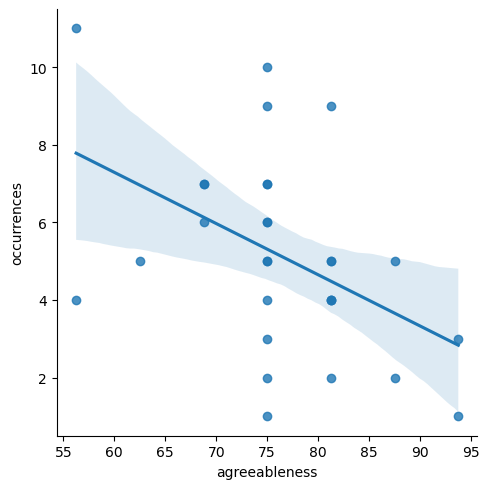

In [65]:
plt.scatter(full_corr["agreeableness"], interaction_counts_df["occurrences"])
scipy.stats.pearsonr(full_corr["agreeableness"], interaction_counts_df["occurrences"])

sns.lmplot(data=full_corr, x="agreeableness", y="occurrences")
scipy.stats.pearsonr(full_corr["agreeableness"], interaction_counts_df["occurrences"])

In [66]:
component_df = pd.DataFrame()
component_df['One'] = clus_df.groupby(['Cluster'])['One'].mean()
component_df['Two'] = clus_df.groupby(['Cluster'])['Two'].mean()
component_df['Three'] = clus_df.groupby(['Cluster'])['Three'].mean()
component_df['Four'] = clus_df.groupby(['Cluster'])['Four'].mean()
component_df['Five'] = clus_df.groupby(['Cluster'])['Five'].mean()

component_df['std_eng'] = clus_df.groupby(['Cluster'])['std'].mean()
component_df['mean_eng'] = clus_df.groupby(['Cluster'])['mean'].mean()

component_df['count'] = clus_df.groupby(['Cluster'])['ID'].count()


component_df['emotional_stability'] = full_corr.groupby(['Cluster'])['emotional_stability'].mean()
component_df['extraversion'] = full_corr.groupby(['Cluster'])['extraversion'].mean()
component_df['agreeableness'] = full_corr.groupby(['Cluster'])['agreeableness'].mean()
component_df['conscientiousness'] = full_corr.groupby(['Cluster'])['conscientiousness'].mean()
component_df['intellect'] = full_corr.groupby(['Cluster'])['intellect'].mean()
component_df['age'] = full_corr.groupby(['Cluster'])['age'].mean()

component_df['social_engagement_mean'] = full_corr.groupby(['Cluster'])['social_engagement_mean'].mean()
component_df['social_engagement_std'] = full_corr.groupby(['Cluster'])['social_engagement_std'].mean()
component_df['social_engagement_after'] = full_corr.groupby(['Cluster'])['social_engagement_after'].mean()
component_df['social_engagement_before'] = full_corr.groupby(['Cluster'])['social_engagement_before'].mean()
component_df['social_engagement_delta'] = full_corr.groupby(['Cluster'])['social_engagement_delta'].mean()


component_df

One        Two      Three       Four       Five   std_eng  \
Cluster                                                                    
0        20.568362  32.783102  31.499778  31.205198  30.678558  0.382285   
1         5.461669   4.925940   6.580358   5.807208   6.245372  0.263043   
2        41.622592  41.597646  39.069773  39.945489  39.553228  0.254979   
3        11.382323  17.628437  16.441762  16.438385  16.773113  0.413589   
4        35.125041  22.225907  23.456715  23.037709  23.094816  0.389712   

         mean_eng  count  emotional_stability  extraversion  agreeableness  \
Cluster                                                                      
0        0.672406     26            72.916667     79.166667      75.000000   
1        0.138009     43            74.107143     73.214286      76.785714   
2        0.860502     24            77.083333     68.750000      70.833333   
3        0.361877     27            75.781250     80.468750      83.593750   
4        0.501758     29            82.500000     70.000000      71.250000   

         conscientiousness  intellect        age  social_engagement_mean  \
Cluster                                                                    
0                62.500000  72.916667  39.000000                0.388104   
1                73.214286  74.107143  34.142857                0.388278   
2                83.333333  71.875000  32.333333                0.379974   
3                77.343750  68.750000  31.875000                0.343367   
4                76.250000  73.750000  33.200000                0.381736   

         social_engagement_std  social_engagement_after  \
Cluster                                                   
0                     0.478741                 0.368232   
1                     0.480479                 0.384565   
2                     0.457212                 0.374069   
3                     0.439973                 0.317641   
4                     0.452637                 0.406021   

         social_engagement_before  social_engagement_delta  
Cluster                                                     
0                        0.399301                -0.031068  
1                        0.399462                -0.014898  
2                        0.354437                 0.019632  
3                        0.325329                -0.007688  
4                        0.356264                 0.049757

In [67]:
for cat in big5+ ["age"]:
    print("First Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["One"])))
    print("Second Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Two"])))
    print("Third Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Three"])))
    print("Fourth Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Four"])))
    print("Fifth Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Five"])))
    print("std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["std_eng"])))
    print("mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["mean_eng"])))
    
    print("count <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["count"])))

    print("soc eng mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_mean"])))
    print("soc eng std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_std"])))
    print("soc eng after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_after"])))
    print("soc eng before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_before"])))
    print("soc eng delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_delta"])))


    print()
print("===================================================")

First Component <-> emotional_stability: (r, p): PearsonRResult(statistic=0.6241657834899621, pvalue=0.26042669895317605) 
Second Component <-> emotional_stability: (r, p): PearsonRResult(statistic=0.08746436206516692, pvalue=0.8887790670465395) 
Third Component <-> emotional_stability: (r, p): PearsonRResult(statistic=0.13623084078345396, pvalue=0.8270835289577607) 
Fourth Component <-> emotional_stability: (r, p): PearsonRResult(statistic=0.13574538256074362, pvalue=0.8276958916561178) 
Fifth Component <-> emotional_stability: (r, p): PearsonRResult(statistic=0.1436419776599989, pvalue=0.8177402457518573) 
std <-> emotional_stability: (r, p): PearsonRResult(statistic=0.2031660509079534, pvalue=0.7431116922409859) 
mean <-> emotional_stability: (r, p): PearsonRResult(statistic=0.1374441964646464, pvalue=0.825553168642046) 
count <-> emotional_stability: (r, p): PearsonRResult(statistic=-0.21344317454037676, pvalue=0.7303135514019315) 
soc eng mean <-> emotional_stability: (r, p): Pear

PearsonRResult(statistic=-0.7984372229010602, pvalue=0.10528398174812646)

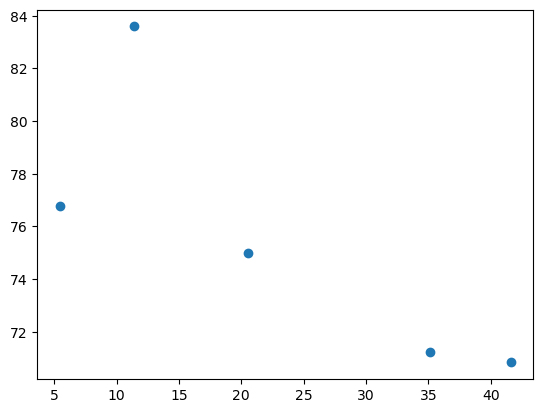

In [68]:
plt.scatter(component_df["One"], component_df["agreeableness"])
scipy.stats.pearsonr(component_df["One"], component_df["agreeableness"])

In [69]:
clu_df = pd.DataFrame()

clu_df['emotional_stability'] = full_corr.groupby(['Cluster'])['emotional_stability'].std()
clu_df['extraversion'] = full_corr.groupby(['Cluster'])['extraversion'].std()
clu_df['agreeableness'] = full_corr.groupby(['Cluster'])['agreeableness'].std()
clu_df['conscientiousness'] = full_corr.groupby(['Cluster'])['conscientiousness'].std()
clu_df['intellect'] = full_corr.groupby(['Cluster'])['intellect'].std()
clu_df['age'] = full_corr.groupby(['Cluster'])['age'].std()

clu_df

emotional_stability  extraversion  agreeableness  conscientiousness  \
Cluster                                                                        
0                   3.608439      9.547033       0.000000          16.535946   
1                   9.834947      6.954358       8.625819          16.423071   
2                  19.229968      3.952847       8.539126          16.614502   
3                   8.476267      8.476267       7.423343          12.911745   
4                  17.897276      2.795085       8.385255          14.921670   

         intellect        age  
Cluster                        
0         3.608439  12.288206  
1         6.681531  11.908380  
2         7.654655  10.366613  
3         8.183171   6.379375  
4         6.846532   4.604346

In [74]:
#t-test
#interactions with highest 1st component -> look at their personality? 
#t-test between personality traits
std_df
high_zero = projected_interactions_df['One'].nlargest(n=12)
high_zero.index
high_zero_std = std_df[std_df.index.isin(high_zero.index)]
high_zero_std = high_zero_std[['ID', 'GROUP', 'Cluster']]


high_zero_std['ID'] = high_zero_std['ID'].astype(int)
# interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'][-1]
for idx, name in high_zero_std.iterrows():
    new = name['GROUP'][-1]
    high_zero_std.loc[idx, 'GROUP'] = new
high_zero_std['GROUP'] = high_zero_std['GROUP'].astype(int)
high_zero_std = high_zero_std.drop_duplicates(keep="first")
high_zero_per = pd.merge(full_corr, high_zero_std, on=['GROUP', 'ID'])
high_zero_emo = high_zero_per[['emotional_stability','extraversion','agreeableness','conscientiousness','intellect']]
# high_zero_emo = high_zero_emo.drop_duplicates(keep='first')

# high_zero_emo.reset_index()
high_zero_emo = high_zero_emo.T
high_zero_emo.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [75]:
from scipy import stats

# Perform pairwise t-tests
for i in range(len(high_zero_emo.columns)):
    for j in range(i + 1, len(high_zero_emo.columns)):
        trait1 = high_zero_emo.columns[i]
        trait2 = high_zero_emo.columns[j]
        t_stat, p_val = stats.ttest_rel(high_zero_emo[trait1], high_zero_emo[trait2])
        print(f"T-test for {trait1} and {trait2}: t-statistic = {t_stat}, p-value = {p_val}")

T-test for 0 and 1: t-statistic = 1.0, p-value = 0.373900966300059
T-test for 0 and 2: t-statistic = -0.7529469661657903, p-value = 0.493370693370418
T-test for 0 and 3: t-statistic = -0.25, p-value = 0.8149020114591812
T-test for 0 and 4: t-statistic = 0.0, p-value = 1.0
T-test for 0 and 5: t-statistic = 2.138089935299395, p-value = 0.09930068321372677
T-test for 0 and 6: t-statistic = -0.6469966392206304, p-value = 0.5528894339334172
T-test for 0 and 7: t-statistic = -0.6246950475544243, p-value = 0.5660371777000408
T-test for 0 and 8: t-statistic = -0.38851434494290565, p-value = 0.7174283599144882
T-test for 0 and 9: t-statistic = 0.6446583712203042, p-value = 0.5542579947169399
T-test for 1 and 2: t-statistic = -1.114772822866588, p-value = 0.32740571539283314
T-test for 1 and 3: t-statistic = -0.560112033611204, p-value = 0.6052866259760656
T-test for 1 and 4: t-statistic = -0.6666666666666666, p-value = 0.541469739275585
T-test for 1 and 5: t-statistic = 1.632993161855452, p-val

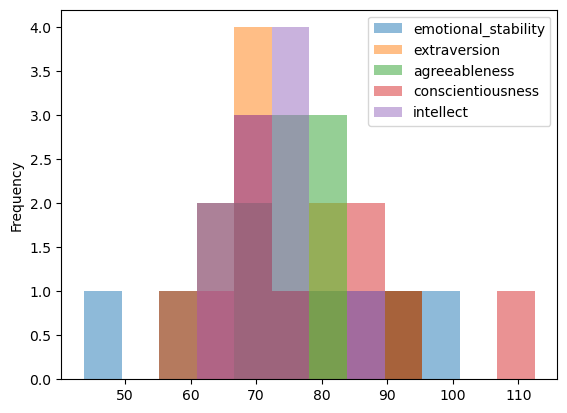

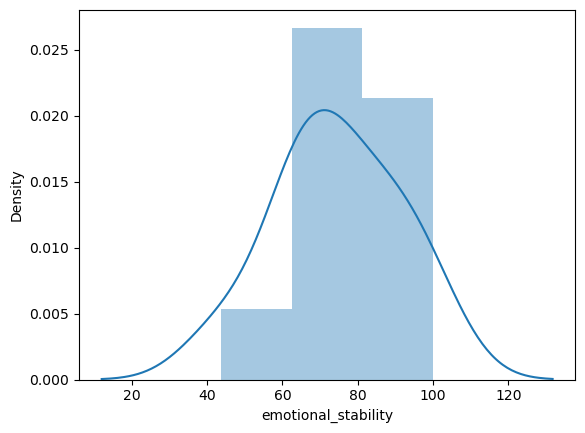

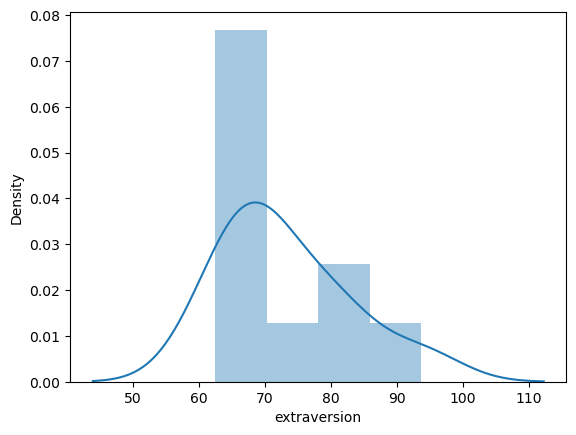

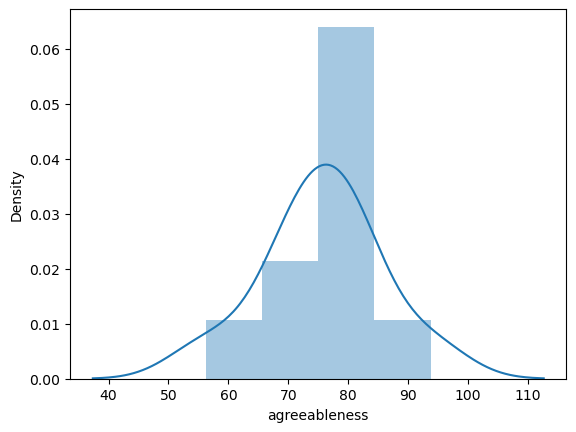

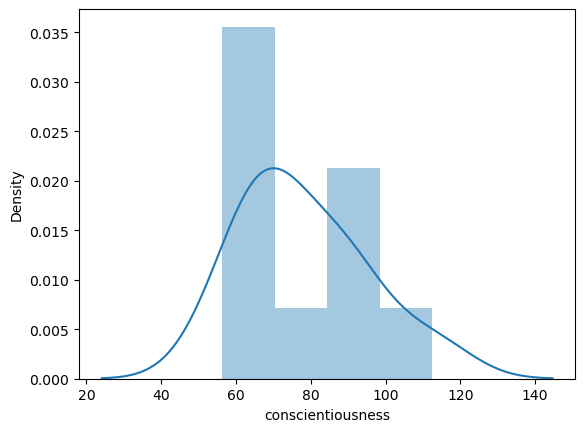

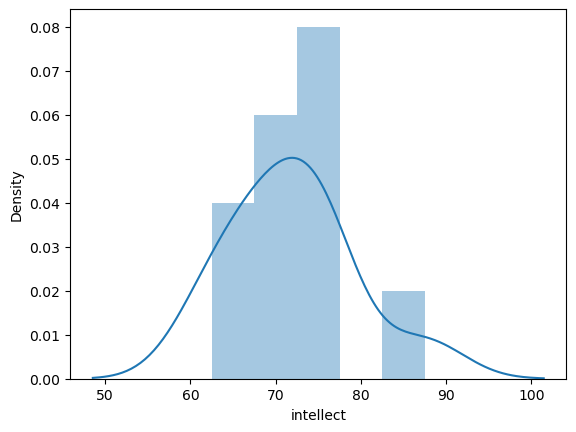

In [77]:
high_zero_emo =high_zero_emo.T
ax = high_zero_emo.plot.hist(bins=12, alpha=0.5)
for column in high_zero_emo[big5].columns:
    plt.figure()
    sns.distplot(high_zero_emo[column])
    
# high_zero_emo.columns

### Detect if someone talking

In [948]:
import feat
from feat import Detector

# Define the function just to extract landmarks from images
detector = Detector(emotion_model='resmasknet', landmark_model="mobilefacenet", au_model='xgb', device='cpu')

detector

##try different model!!!!

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

In [20]:
video_prediction = detector.detect_video("videos/H1s.mp4", skip_frames=24)
video_prediction.head()

100%|███████████████████████████████████████| 248/248 [1:16:11<00:00, 18.43s/it]


FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
frame                                                                      
0       532.563961    9.967422     780.827320      997.105448   0.992355   
24      531.064155   -4.842649     775.902687      999.974197   0.990961   
48      566.043095  -59.444923     804.724289     1072.035427   0.989011   
72      567.384453  -20.973644     818.857496     1061.639273   0.987186   
72     1435.308027  478.783121      55.583254       62.240325   0.880153   

               x_0          x_1          x_2          x_3          x_4  ...  \
frame                                                                   ...   
0       570.161365   570.395058   581.043308   603.839103   646.817455  ...   
24      563.114675   565.335809   579.351759   606.251386   652.944347  ...   
48      569.165530   570.504059   584.957948   611.856668   654.867630  ...   
72      531.454649   537.652810   557.953823   588.028309   632.719703  ...   
72     1442.385846  1440.565313  1440.196010  1439.958253  1439.866873  ...   

          anger   disgust      fear  happiness   sadness  surprise   neutral  \
frame                                                                          
0      0.000108  0.016044  0.000142   0.224129  0.131102  0.000431  0.628045   
24     0.000072  0.003285  0.000030   0.470029  0.168435  0.000177  0.357972   
48     0.001277  0.007510  0.007431   0.139870  0.153835  0.019572  0.670504   
72     0.001197  0.003922  0.011565   0.352511  0.221603  0.313005  0.096198   
72     0.123673  0.323415  0.082240   0.279507  0.129806  0.024104  0.037254   

                input  frame  approx_time  
frame                                      
0      videos/H1s.mp4      0        00:00  
24     videos/H1s.mp4     24        00:00  
48     videos/H1s.mp4     48        00:00  
72     videos/H1s.mp4     72        00:01  
72     videos/H1s.mp4     72        00:01  

[5 rows x 174 columns]

In [4]:
print(video_prediction.columns.tolist())

['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight', 'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', '

In [6]:
video_prediction['AU25'].mean()
# video_prediction['AU27'].max()
# video_prediction['AU22'].max()
# video_prediction['AU14'].max()
# video_prediction['AU26'].max()

0.24123338

In [10]:


mouth = video_prediction[["AU25", "AU26", "AU14"]]
mouth.iloc[150:180]

AU25      AU26      AU14
frame                              
3528   0.358712  0.341844  0.216655
3552   0.102041  0.096459  0.280882
3576   0.008942  0.105147  0.269985
3600   0.081196  0.202491  0.173768
3624   0.643201  0.119092  0.249561
3624   0.810326  0.097260  0.623785
3648   0.110290  0.127742  0.345433
3672   0.153207  0.177455  0.520680
3696   0.219818  0.155854  0.528218
3720   0.775021  0.090153  0.426988
3744   0.169367  0.157559  0.431578
3768   0.292496  0.102191  0.343140
3792   0.906183  0.498110  0.174598
3816   0.122669  0.214201  0.187119
3840   0.048341  0.184248  0.277051
3864   0.048479  0.154014  0.372769
3888   0.025162  0.093680  0.403279
3912   0.081039  0.423501  0.594517
3936   0.074056  0.172562  0.589890
3960   0.115731  0.452172  0.389371
3984   0.050268  0.180894  0.269405
4008   0.113643  0.316171  0.528033
4032   0.179619  0.365015  0.390431
4056   0.202178  0.253346  0.464590
4080   0.371003  0.383603  0.319375
4104   0.003959  0.184879  0.334447
4128   0.569733  0.324537  0.396223
4152   0.107284  0.392294  0.425218
4176   0.187478  0.478269  0.559717
4200   0.090989  0.446169  0.339091

In [14]:
talking = video_prediction.loc[(video_prediction['AU25'] >= 0.5)]
talking

FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
frame                                                                      
264     591.579087  -26.218017     789.476197     1098.641643   0.993102   
1200    525.997361   -8.271468     746.943807     1016.173981   0.991313   
1248   1498.122615  687.432755      84.358451      107.830941   0.624091   
1320    546.287795   14.122174     756.349073     1044.342746   0.978113   
1368    513.497846   -6.151719     799.598827     1065.187153   0.980322   
1704    432.882462  -17.776801     799.160566     1057.115303   0.979189   
1776    546.743611  -19.952512     787.712794     1046.410364   0.984833   
1800    527.946610  -20.495589     797.871765     1045.259944   0.990759   
1848    634.841961    5.431215     772.625686      968.795452   0.988635   
1920    473.080719  -84.784735     770.015431     1040.308500   0.986640   
1944    455.720084 -130.187308     775.162027     1046.401517   0.979198   
1992    692.757112  -17.586170     750.782815      923.010048   0.978823   
2016    580.536811  -40.927218     753.864727      964.544295   0.986829   
2496    581.662281   78.724731     780.277277     1011.168095   0.991287   
2736    501.782748  -28.324855     818.138083     1028.337353   0.994924   
2760    485.802682  -25.707324     834.505345     1034.325658   0.994150   
2928    526.189282  -10.577640     804.048672     1030.884653   0.990866   
3264    541.968966   -9.798732     768.027157     1016.730807   0.988293   
3384    654.834730  -45.024111     763.140133      948.675729   0.991451   
3624    542.354261   -3.934213     743.752758      956.705975   0.992919   
3624    111.861395  305.893073     184.378168      241.222235   0.567725   
3720    550.821058    4.894724     781.579049     1017.472908   0.990623   
3792    587.700233  -43.062449     794.642325     1001.369044   0.990759   
4128    416.325889  -88.904597     801.739772      977.595585   0.981109   
4224    646.138031  -87.128331     778.574219      936.711652   0.989829   
4248    697.441183  -50.298938     754.537139      952.438741   0.993513   
4704    620.957106  -45.198646     825.819642     1096.897286   0.980700   
4800    435.034664  -45.983176     771.668282      952.590283   0.986790   
4800    167.770008  445.882969      87.616479      151.743804   0.697690   
4848    566.201246  -75.967460     769.869990      967.301610   0.990434   
5088    549.971933  -15.828215     791.478150     1054.431252   0.981382   
5112    512.966551   -7.905241     774.968057     1022.051077   0.989831   
5208    550.303703  -12.421531     778.904908     1045.362097   0.988599   
5232    547.271812   -6.279642     769.589769     1001.161930   0.991173   
5256    547.633662   -6.850410     765.778641      999.430716   0.993397   
5280    548.994029    3.138407     760.942308     1016.803458   0.993728   
5304    529.262024    0.627405     781.133670     1038.130056   0.991778   
5328    539.259117   -4.986731     778.764201     1029.624671   0.991993   
5472    539.842408   21.008242     780.281787      990.665867   0.984237   
5688    549.942860    1.005969     766.264499     1006.711009   0.993455   
5712    536.766199   -4.082695     772.310912     1017.031298   0.991633   
5736    543.459678    0.127216     767.574584     1010.855885   0.991763   
5784    535.897058    4.063742     775.763545     1021.613436   0.989540   

               x_0          x_1          x_2          x_3          x_4  ...  \
frame                                                                   ...   
264     515.216702   529.333204   557.775862   597.789668   655.236249  ...   
1200    534.166858   533.849926   546.408360   572.901413   620.165778  ...   
1248   1511.742292  1509.421750  1508.051610  1508.550142  1511.747005  ...   
1320    564.009824   559.176466   565.601136   589.165493   635.686488  ...   
1368    535.524606   531.294184   540.687170   569.248573   621.560805  ...   
1704    417.602811   426.607488   4

In [ ]:
#split video into frames
#ffmpeg -i videos/CROP/H1CROP.mp4 -vf fps=1 "videos/CROP/frames/group4/H1-frame%05d.png"